# 1. Dataset

- source: https://www.kaggle.com/datasets/quangvinhhuynh/marketing-and-retail-analyst-e-comerce

## orders

- `order_id`(PK): 주문의 고유 식별자, 이 테이블의 기본 키 역할
- `customer_id`: 고객의 고유 식별자
- `order_status`: 주문 상태. 예: 배송됨, 취소됨, 처리 중 등
- `order_purchase_timestamp`: 고객이 주문을 한 시점의 타임스탬프
- `order_approved_at`: 판매자가 주문을 승인한 시점의 타임스탬프
- `order_delivered_timestamp`: 고객 위치에 주문이 배송된 시점의 타임스탬프
- `order_estimated_delivery_date`: 주문할 때 고객에게 제공된 예상 배송 날짜

## order_items

- `order_id`(PK): 주문의 고유 식별자
- `order_item_id`(PK):  각 주문 내 항목 번호. 이 컬럼과 함께 order_id가 이 테이블의 기본 키 역할
- `product_id`: 제품의 고유 식별자
- `seller_id`: 판매자의 고유 식별자
- `price`: 제품의 판매 가격
- `shipping_charges`: 제품의 배송에 관련된 비용

## customers

- `customer_id`(PK): 고객의 고유 식별자, 이 테이블의 기본 키 역할
- `customer_zip_code_prefix`: 고객의 우편번호
- `customer_city`: 고객의 도시
- `customer_state`: 고객의 주

## payments

- `order_id`: 주문의 고유 식별자, 이 테이블에서 이 컬럼은 중복될 수 있다
- `payment_sequential`: 주어진 주문에 대한 결제 순서 정보를 제공
- `payment_type`: 결제 유형 예: 신용카드, 직불카드 등
- `payment_installments`: 신용카드 결제 시 할부 회차
- `payment_value`: 거래 금액

## products
- `product_id`: 각 제품의 고유 식별자, 이 테이블의 기본 키 역할
- `product_category_name`: 제품이 속한 카테고리 이름
- `product_weight_g`: 제품 무게 (그램)
- `product_length_cm`: 제품 길이 (센티미터)
- `product_height_cm`: 제품 높이 (센티미터)
- `product_width_cm`: 제품 너비 (센티미터)

## 1-1. Data load

- merge_df : 모든 테이블을 하나의 데이테세으로 만든 데이터

In [1]:
# 필요한 모듈들 모두 이 셀에서 관리

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# 데이터 불러오기
import pandas as pd
customers_df = pd.read_csv("D:/bootcamp/machine_learning/project/customers.csv") #99441
order_items_df = pd.read_csv("D:/bootcamp/machine_learning/project/order_items.csv") #112650
orders_df = pd.read_csv("D:/bootcamp/machine_learning/project/orders.csv") #99441
payments_df = pd.read_csv("D:/bootcamp/machine_learning/project/payments.csv") #103886
products_df = pd.read_csv("D:/bootcamp/machine_learning/project/products.csv") #32951

In [3]:
customers_df = customers_df.drop_duplicates()

# orders_df와 customers_df를 customer_id를 기준으로 병합
merged_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

# merged_df와 order_items_df를 order_id를 기준으로 병합
merged_df = pd.merge(merged_df, order_items_df, on='order_id', how='left')

# merged_df와 payments_df를 order_id를 기준으로 병합
merged_df = pd.merge(merged_df, payments_df, on='order_id', how='left')

# merged_df와 products_df를 product_id를 기준으로 병합
final_df = pd.merge(merged_df, products_df, on='product_id', how='left')

# 결과를 CSV 파일로 저장
# final_df.to_csv("merged_data_final.csv", index=False)
merge_df = final_df

In [4]:
merge_df.head(5)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
3  53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
4  47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered          10/2/2017 10:56   10/2/2017 11:07   
1    delivered          10/2/2017 10:56   10/2/2017 11:07   
2    delivered          10/2/2017 10:56   10/2/2017 11:07   
3    delivered          7/24/2018 20:41    7/26/2018 3:24   
4    delivered            8/8/2018 8:38     8/8/2018 8:55   

  order_delivered_timestamp order_estimated_delivery_date  \
0          10/10/2017 21:25               10/18/2017 0:00   
1          10/10/2017 21:25               10/18/2017 0:00   
2          10/10/2017 21:25               10/18/2017 0:00   
3            8/7/2018 15:27                8/13/2018 0:00   
4           8/17/2018 18:06                 9/4/2018 0:00   

   customer_zip_code_prefix customer_city customer_state  ...  \
0                      3149     sao paulo             SP  ...   
1                      3149     sao paulo             SP  ...   
2                      3149     sao paulo             SP  ...   
3                     47813     barreiras             BA  ...   
4                     75265    vianopolis             GO  ...   

   shipping_charges payment_sequential payment_type  payment_installments  \
0              8.72                1.0  credit_card                   1.0   
1              8.72                3.0      voucher                   1.0   
2              8.72                2.0      voucher                   1.0   
3             22.76                1.0       wallet                   1.0   
4             19.22                1.0  credit_card                   3.0   

   payment_value  product_category_name product_weight_g  product_length_cm  \
0          18.12             housewares            500.0               19.0   
1           2.00             housewares            500.0               19.0   
2          18.59             housewares            500.0               19.0   
3         141.46                   toys            400.0               19.0   
4         179.12                   toys            420.0               24.0   

   product_height_cm product_width_cm  
0                8.0             13.0  
1                8.0             13.0  
2                8.0             13.0  
3               13.0             19.0  
4               19.0             21.0  

[5 rows x 24 columns]

# 2. Exploratory Data Analysis(EDA)


## 2-1. 데이터 간단히 살펴보기

In [5]:
# 데이터 정보 요약 : info()

merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119160 entries, 0 to 119159
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119160 non-null  object 
 1   customer_id                    119160 non-null  object 
 2   order_status                   119160 non-null  object 
 3   order_purchase_timestamp       119160 non-null  object 
 4   order_approved_at              118982 non-null  object 
 5   order_delivered_timestamp      115738 non-null  object 
 6   order_estimated_delivery_date  119160 non-null  object 
 7   customer_zip_code_prefix       119160 non-null  int64  
 8   customer_city                  119160 non-null  object 
 9   customer_state                 119160 non-null  object 
 10  order_item_id                  118325 non-null  float64
 11  product_id                     118325 non-null  object 
 12  seller_id                     

In [6]:
# 데이터 기술통계량 : describe()

merge_df.describe(include='all')

order_id                       customer_id  \
count                             119160                            119160   
unique                             99441                             96096   
top     895ab968e7bb0d5659d16cd74cd1650c  9a736b248f67d166d2fbb006bcb877c3   
freq                                  63                                75   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status order_purchase_timestamp order_approved_at  \
count        119160                   119160            118982   
unique            8                    88789             50462   
top       delivered           8/8/2017 20:26   1/10/2018 10:32   
freq         115739                       63               121   
mean            NaN                      NaN               NaN   
std             NaN                      NaN               NaN   
min             NaN                      NaN               NaN   
25%             NaN                      NaN               NaN   
50%             NaN                      NaN               NaN   
75%             NaN                      NaN               NaN   
max             NaN                      NaN               NaN   

       order_delivered_timestamp order_estimated_delivery_date  \
count                     115738                        119160   
unique                     75649                           459   
top              8/14/2017 12:46               12/20/2017 0:00   
freq                          63                           658   
mean                         NaN                           NaN   
std                          NaN                           NaN   
min                          NaN                           NaN   
25%                          NaN                           NaN   
50%                          NaN                           NaN   
75%                          NaN                           NaN   
max                          NaN                           NaN   

        customer_zip_code_prefix customer_city customer_state  ...  \
count              119160.000000        119160         119160  ...   
unique                       NaN          4119             27  ...   
top                          NaN     sao paulo             SP  ...   
freq                         NaN         18864          50305  ...   
mean                35000.842204           NaN            NaN  ...   
std                 29806.174149           NaN            NaN  ...   
min                  1003.000000           NaN            NaN  ...   
25%                 11250.000000           NaN            NaN  ...   
50%                 24240.000000           NaN            NaN  ...   
75%                 58415.000000           NaN            NaN  ...   
max                 99990.000000           NaN            NaN  ...   

        shipping_charges payment_sequential payment_type  \
count      118325.000000      119157.000000       119157   
unique               NaN                NaN            5   
top                  NaN                NaN  credit_card   
freq                 NaN                NaN        87795   
mean           20.037466           1.094178          NaN   
std            15.847918           0.726675          NaN   
min             0.000000           1.000000          NaN   
25%            13.080000           1.000000          NaN   
50%            16.280000           1.000000          NaN   
75%            21.190000           1.000000          NaN   
max     

In [7]:
# 결측치 확인

merge_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 178
order_delivered_timestamp        3422
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     835
product_id                        835
seller_id                         835
price                             835
shipping_charges                  835
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_category_name            1267
product_weight_g                  855
product_length_cm                 855
product_height_cm                 855
product_width_cm                  855
dtype: int64

In [8]:
# 결측치를 포함하는 column

missing_columns = merge_df.isna().sum()[merge_df.isna().sum() > 0].index
missing_columns

Index(['order_approved_at', 'order_delivered_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price', 'shipping_charges',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

수치형, 범주형 변수 나눠서 데이터 살펴보기

In [9]:
merge_df.iloc[:, 0:13].head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered          10/2/2017 10:56   10/2/2017 11:07   
1    delivered          10/2/2017 10:56   10/2/2017 11:07   
2    delivered          10/2/2017 10:56   10/2/2017 11:07   

  order_delivered_timestamp order_estimated_delivery_date  \
0          10/10/2017 21:25               10/18/2017 0:00   
1          10/10/2017 21:25               10/18/2017 0:00   
2          10/10/2017 21:25               10/18/2017 0:00   

   customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                      3149     sao paulo             SP            1.0   
1                      3149     sao paulo             SP            1.0   
2                      3149     sao paulo             SP            1.0   

                         product_id                         seller_id  
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9  
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9

In [10]:
merge_df.iloc[:, 13:].head(3)

price  shipping_charges  payment_sequential payment_type  \
0  29.99              8.72                 1.0  credit_card   
1  29.99              8.72                 3.0      voucher   
2  29.99              8.72                 2.0      voucher   

   payment_installments  payment_value product_category_name  \
0                   1.0          18.12            housewares   
1                   1.0           2.00            housewares   
2                   1.0          18.59            housewares   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             500.0               19.0                8.0              13.0  
1             500.0               19.0                8.0              13.0  
2             500.0               19.0                8.0              13.0

수치형:
- `order_item_id`
- `price`
- `shipping_charges`
- `payment_sequential` : 애매하긴 한데... 일단 수치형
- `payment_installments`
- `payment_value`
- `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`


범주형:
- `order_status`
- `order_purchase_timestamp`, `order_approved_at`, `order_delivered_timestamp`, `order_estimated_delivery_date` : 나중에 분기별로 혹은 달별로 범주를 나눠 사용하면 좋을듯
- `customer_zip_code_prefix`, `customer_city`, `customer_state`
- `payment_type`
- `product_category_name`

In [11]:
numerical_cols = ['order_item_id', 'price', 'shipping_charges', 'payment_sequential', 'payment_installments', 'payment_value',
                           'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
categorical_cols = ['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 
                             'order_estimated_delivery_date', 'customer_zip_code_prefix', 'customer_city', 'customer_state',
                             'payment_type', 'product_category_name']

In [12]:
# 수치형 변수에 대한 value_counts

numerical_df = merge_df[numerical_cols]

for col in numerical_df.columns:
    print(numerical_df[col].value_counts().to_frame().join(numerical_df[col].value_counts(normalize=True).to_frame().cumsum()))
    print("=" * 50)

                count  proportion
order_item_id                    
1.0            103656    0.876028
2.0             10314    0.963195
3.0              2403    0.983503
4.0               995    0.991912
5.0               473    0.995910
6.0               264    0.998141
7.0                62    0.998665
8.0                37    0.998977
9.0                29    0.999222
10.0               26    0.999442
11.0               17    0.999586
12.0               13    0.999696
13.0                8    0.999763
14.0                7    0.999823
15.0                5    0.999865
16.0                3    0.999890
17.0                3    0.999915
18.0                3    0.999941
19.0                3    0.999966
20.0                3    0.999992
21.0                1    1.000000
        count  proportion
price                    
59.90    2628    0.022210
69.90    2116    0.040093
49.90    2049    0.057410
89.90    1632    0.071202
99.90    1531    0.084141
...       ...         ...
424.90    

In [13]:
# 수치형 변수 기술통계량

numerical_df.describe()

order_item_id          price  shipping_charges  payment_sequential  \
count  118325.000000  118325.000000     118325.000000       119157.000000   
mean        1.196569     120.729200         20.037466            1.094178   
std         0.699144     184.130919         15.847918            0.726675   
min         1.000000       0.850000          0.000000            1.000000   
25%         1.000000      39.900000         13.080000            1.000000   
50%         1.000000      74.900000         16.280000            1.000000   
75%         1.000000     134.900000         21.190000            1.000000   
max        21.000000    6735.000000        409.680000           29.000000   

       payment_installments  payment_value  product_weight_g  \
count         119157.000000  119157.000000     118305.000000   
mean               2.941053     172.825878       2113.957364   
std                2.777111     267.813648       3789.273735   
min                0.000000       0.000000          0.000000   
25%                1.000000      60.890000        300.000000   
50%                2.000000     108.210000        700.000000   
75%                4.000000     189.260000       1800.000000   
max               24.000000   13664.080000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  
count      118305.000000      118305.000000     118305.000000  
mean           30.254537          16.633143         23.066692  
std            16.189991          13.453618         11.743808  
min             7.000000           2.000000          6.000000  
25%            18.000000           8.000000         15.000000  
50%            25.000000          13.000000         20.000000  
75%            38.000000          20.000000         30.000000  
max           105.000000         105.000000        118.000000

In [14]:
# 범주형 변수에 대한 value_counts

categorical_df = merge_df[categorical_cols]

for col in categorical_df.columns:
    print(categorical_df[col].value_counts().to_frame().join(categorical_df[col].value_counts(normalize=True).to_frame().cumsum()))
    print("=" * 50)

               count  proportion
order_status                    
delivered     115739    0.971291
shipped         1257    0.981840
canceled         752    0.988150
unavailable      653    0.993630
processing       376    0.996786
invoiced         375    0.999933
created            5    0.999975
approved           3    1.000000
                          count  proportion
order_purchase_timestamp                   
8/8/2017 20:26               63    0.000529
9/23/2017 14:56              38    0.000848
8/2/2018 12:06               35    0.001141
8/2/2018 12:05               31    0.001401
4/20/2017 12:45              29    0.001645
...                         ...         ...
8/17/2018 7:44                1    0.999966
12/26/2017 14:16              1    0.999975
7/6/2018 19:14                1    0.999983
10/15/2017 18:32              1    0.999992
3/8/2018 20:57                1    1.000000

[88789 rows x 2 columns]
                   count  proportion
order_approved_at                  

In [15]:
numerical_df.describe(include='all')

order_item_id          price  shipping_charges  payment_sequential  \
count  118325.000000  118325.000000     118325.000000       119157.000000   
mean        1.196569     120.729200         20.037466            1.094178   
std         0.699144     184.130919         15.847918            0.726675   
min         1.000000       0.850000          0.000000            1.000000   
25%         1.000000      39.900000         13.080000            1.000000   
50%         1.000000      74.900000         16.280000            1.000000   
75%         1.000000     134.900000         21.190000            1.000000   
max        21.000000    6735.000000        409.680000           29.000000   

       payment_installments  payment_value  product_weight_g  \
count         119157.000000  119157.000000     118305.000000   
mean               2.941053     172.825878       2113.957364   
std                2.777111     267.813648       3789.273735   
min                0.000000       0.000000          0.000000   
25%                1.000000      60.890000        300.000000   
50%                2.000000     108.210000        700.000000   
75%                4.000000     189.260000       1800.000000   
max               24.000000   13664.080000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  
count      118305.000000      118305.000000     118305.000000  
mean           30.254537          16.633143         23.066692  
std            16.189991          13.453618         11.743808  
min             7.000000           2.000000          6.000000  
25%            18.000000           8.000000         15.000000  
50%            25.000000          13.000000         20.000000  
75%            38.000000          20.000000         30.000000  
max           105.000000         105.000000        118.000000

## 2-2. 데이터 시각화

수치형 시각화 방법:
- 히스토그램 : histplot()
- 커널밀도추정함수 그래프 : kdeplot()
- 분포도 : displot()
- 박스플롯 : boxplot()
- 페어플롯 : pairplot()

범주형 시각화 방법:
- 막대그래프 : barplot()
- 카운트플롯 : countplot()
- 박스플롯 : boxplot()

데이터 상관관계 시각화 방법: <u>데이터 전처리 후 볼 예정</u>
- 히트맵 : heatmpap()
- 라인플롯 : lineplot()
- 산점도 : scatterplot()
- 회귀선을 포함한 산점도 그래프 : regplot()


### 2-2-1. 수치형 시각화

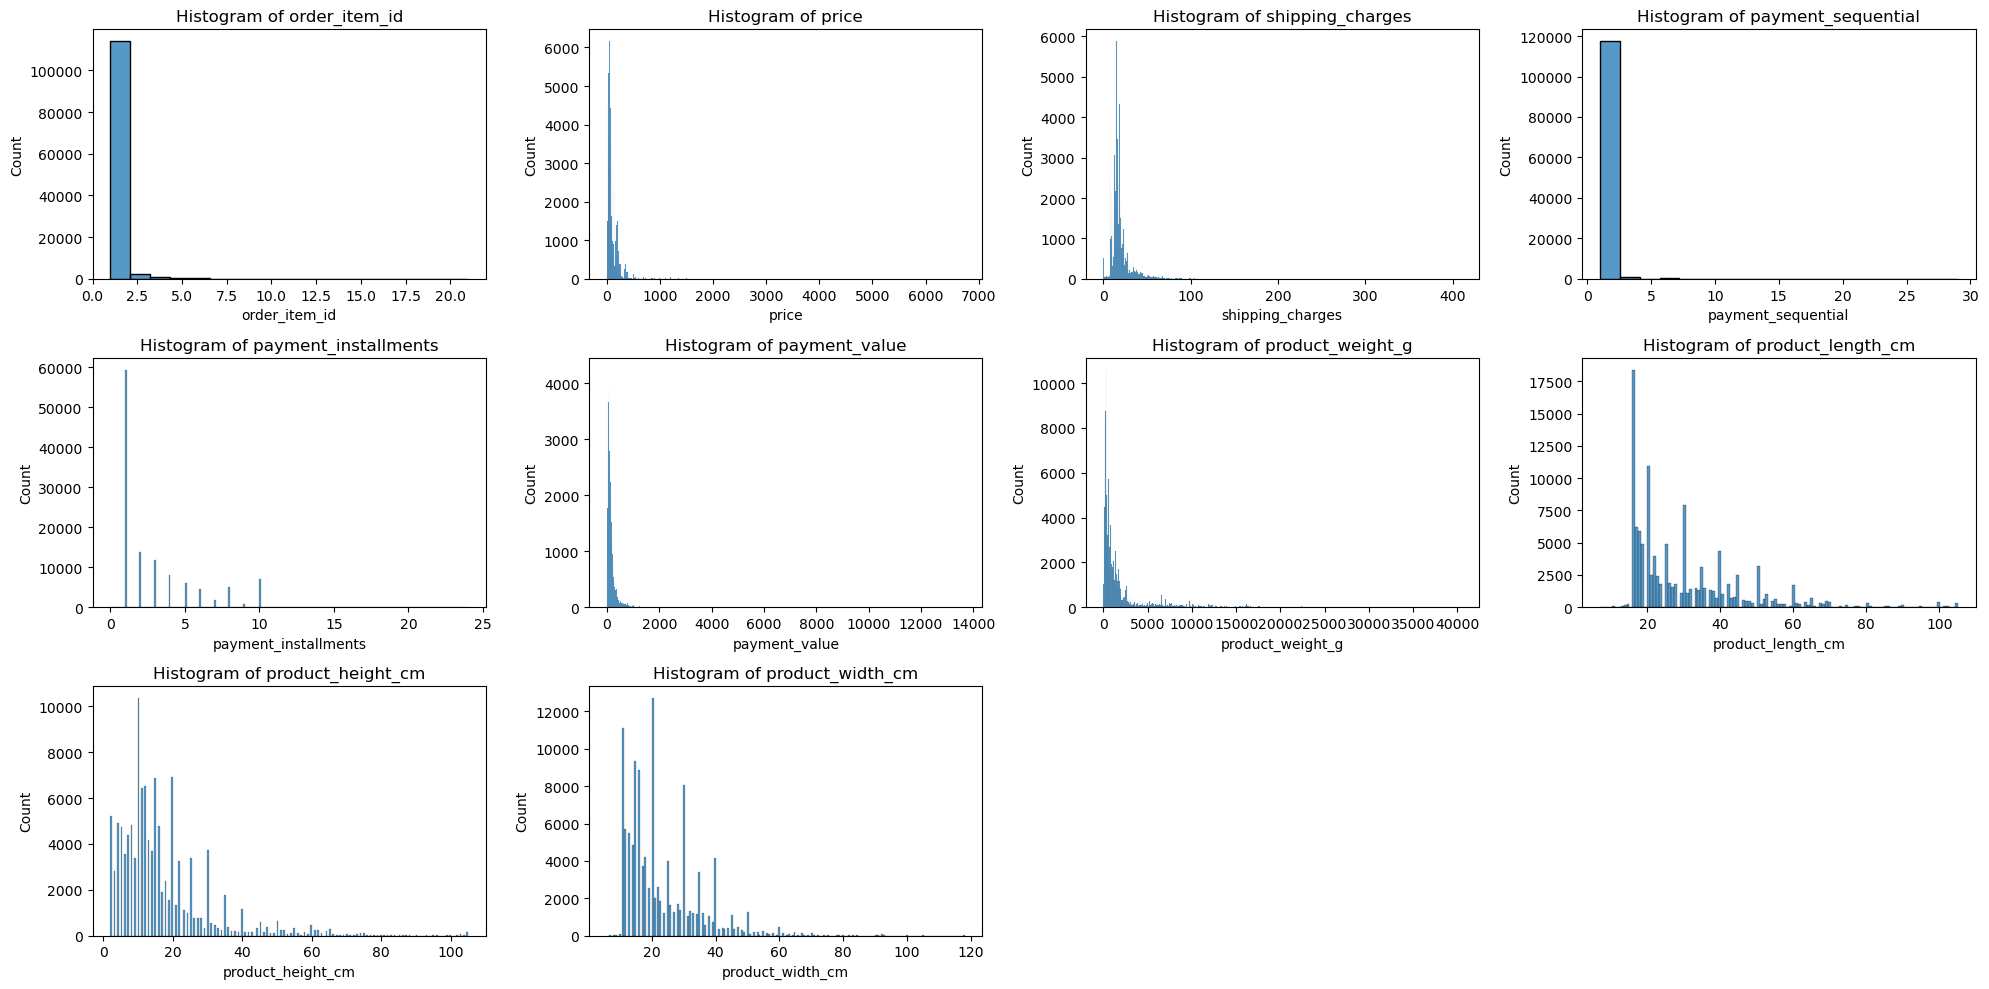

In [16]:
# 수치형 히스토그램
plt.figure(figsize=(20, 10))

for idx, col in enumerate(numerical_cols):
    plt.subplot(3, 4, idx+1)
    ax = sns.histplot(merge_df[col], kde=False)
    plt.title(f'Histogram of {col}')

plt.tight_layout()  
plt.show()


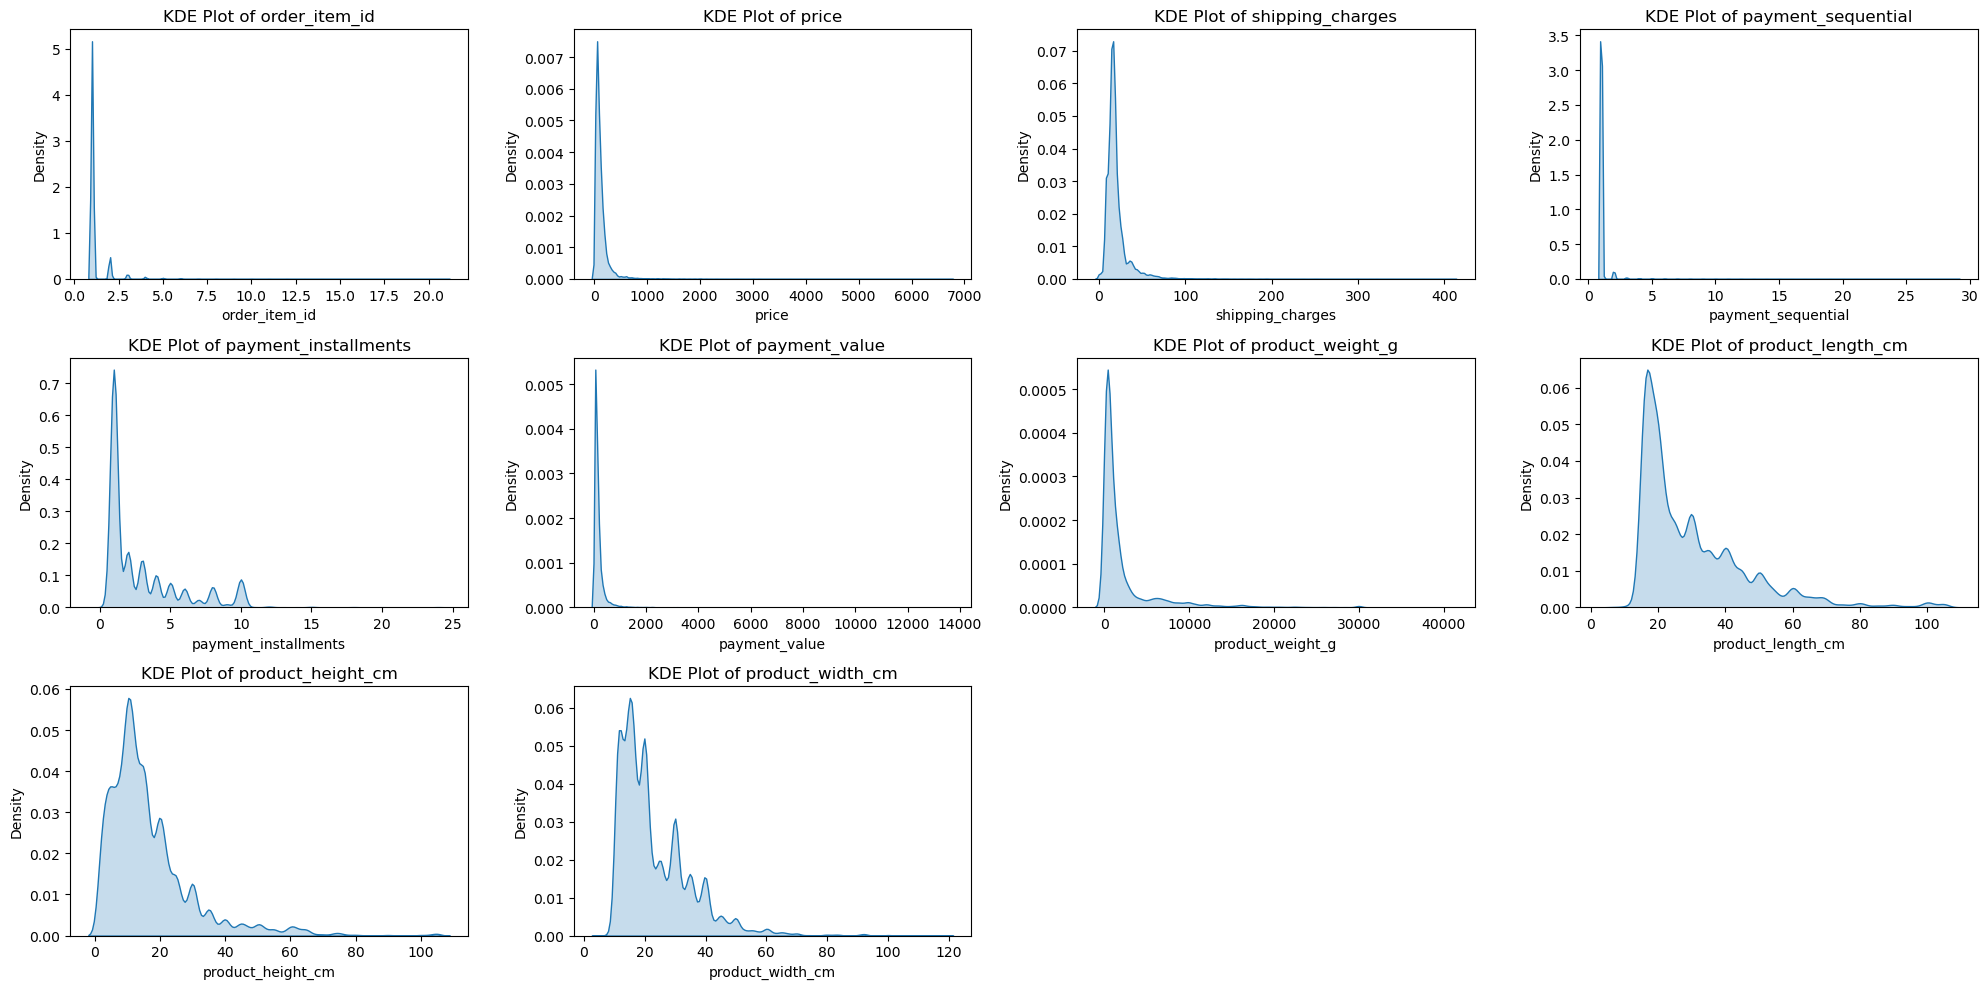

In [17]:
# 수치형 kdeplot()

plt.figure(figsize=(20, 10))

for idx, col in enumerate(numerical_cols):
    plt.subplot(3, 4, idx+1)
    ax = sns.kdeplot(merge_df[col], shade=True)
    plt.title(f'KDE Plot of {col}')

plt.tight_layout()  
plt.show()


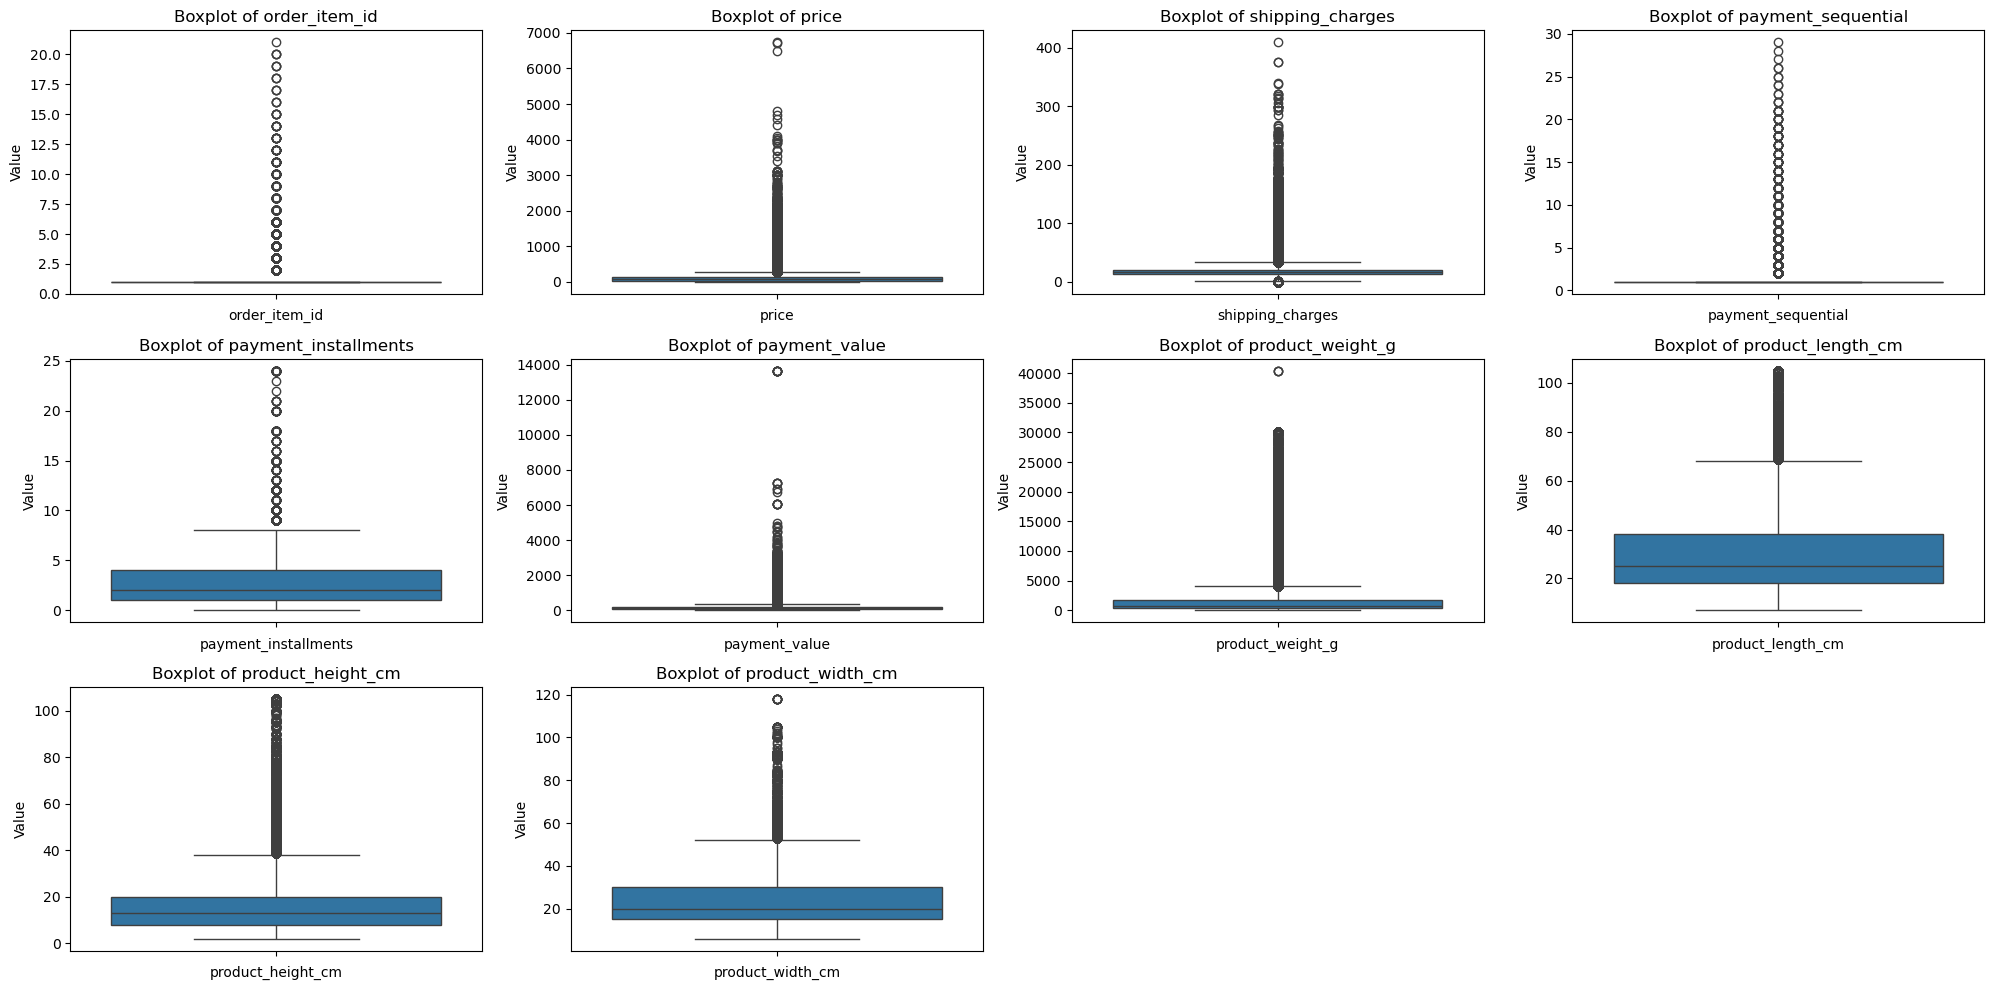

In [18]:
# 수치형 boxplot

plt.figure(figsize=(20, 10))

for idx, col in enumerate(numerical_cols):
    plt.subplot(3, 4, idx+1)
    sns.boxplot(y=merge_df[col])  
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col) 
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

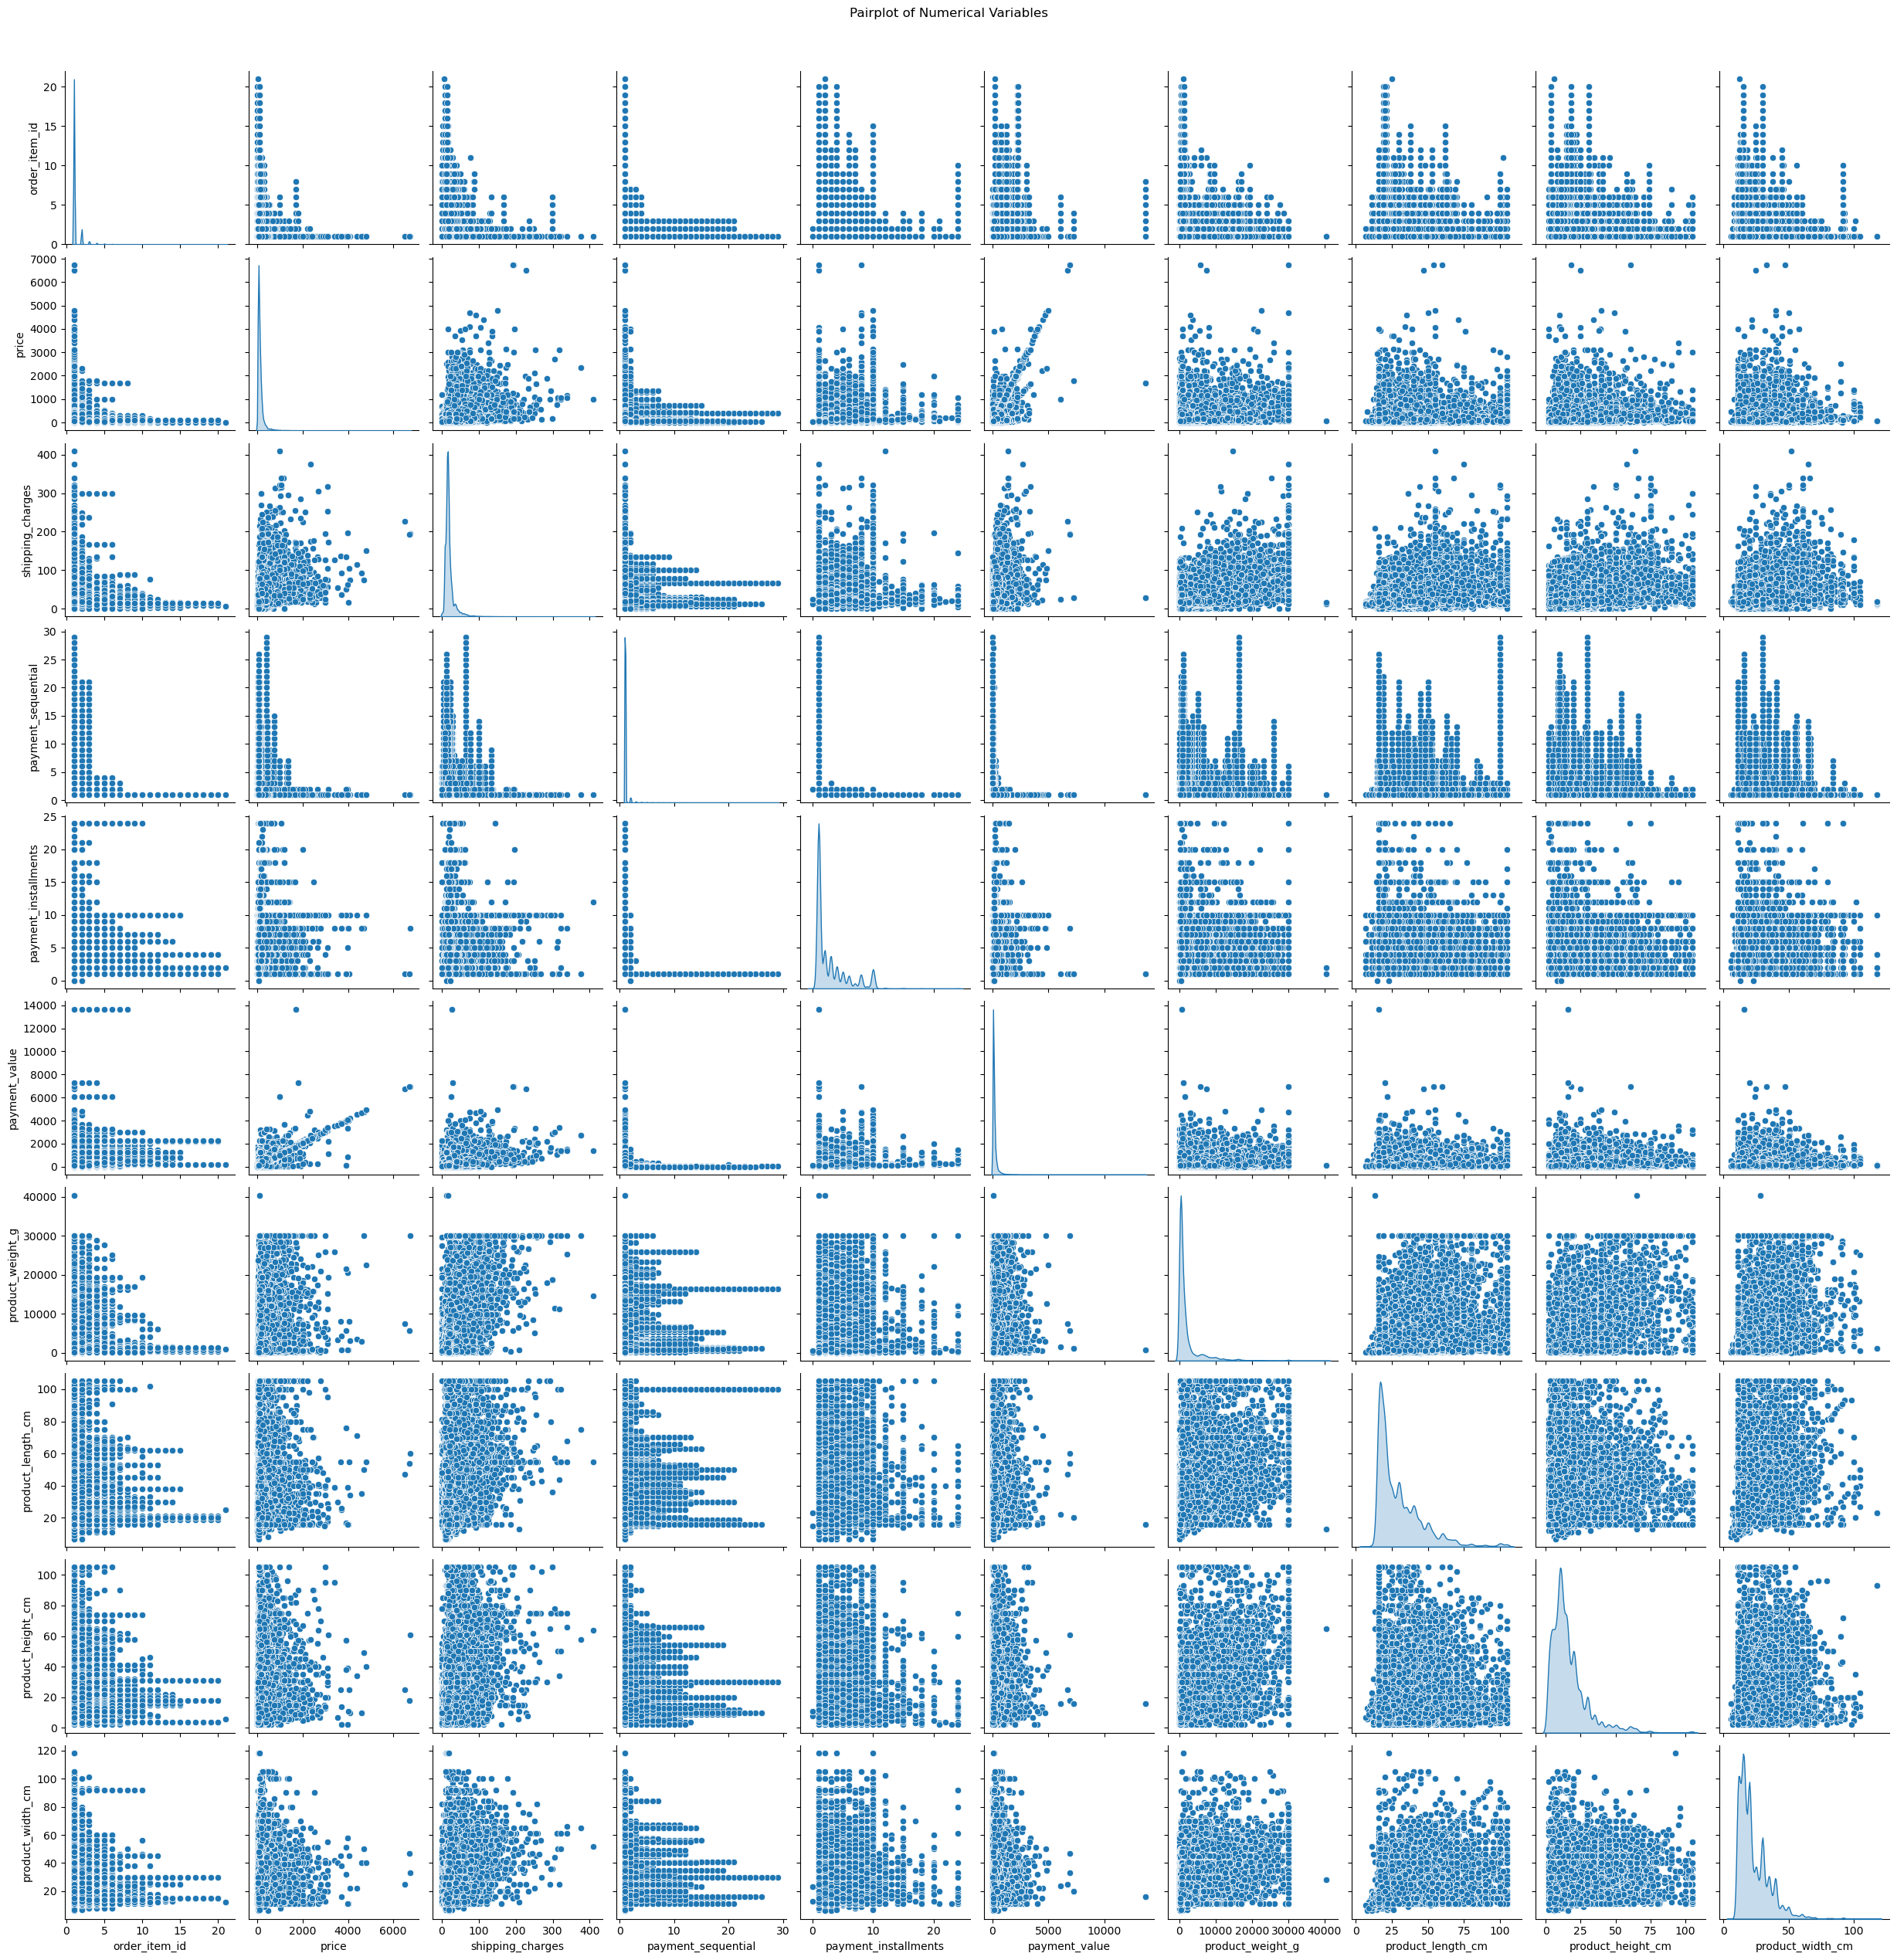

In [19]:
# 수치형 pairplot

sns.pairplot(merge_df[numerical_cols], diag_kind='kde')  
plt.suptitle('Pairplot of Numerical Variables', y=1.02)  
plt.show()

수치형 변수 시각화 해석:
- 시각화 결과 모든 column에서 데이터의 왼쪽 쏠림 현상 발견.
- 데이터의 표준화가 필요할 거 같다.
- 박스플롯을 살펴봤을 때 이상치가 많아 정제가 필요할 거 같다.

### 2-2-2. 범주형 시각화

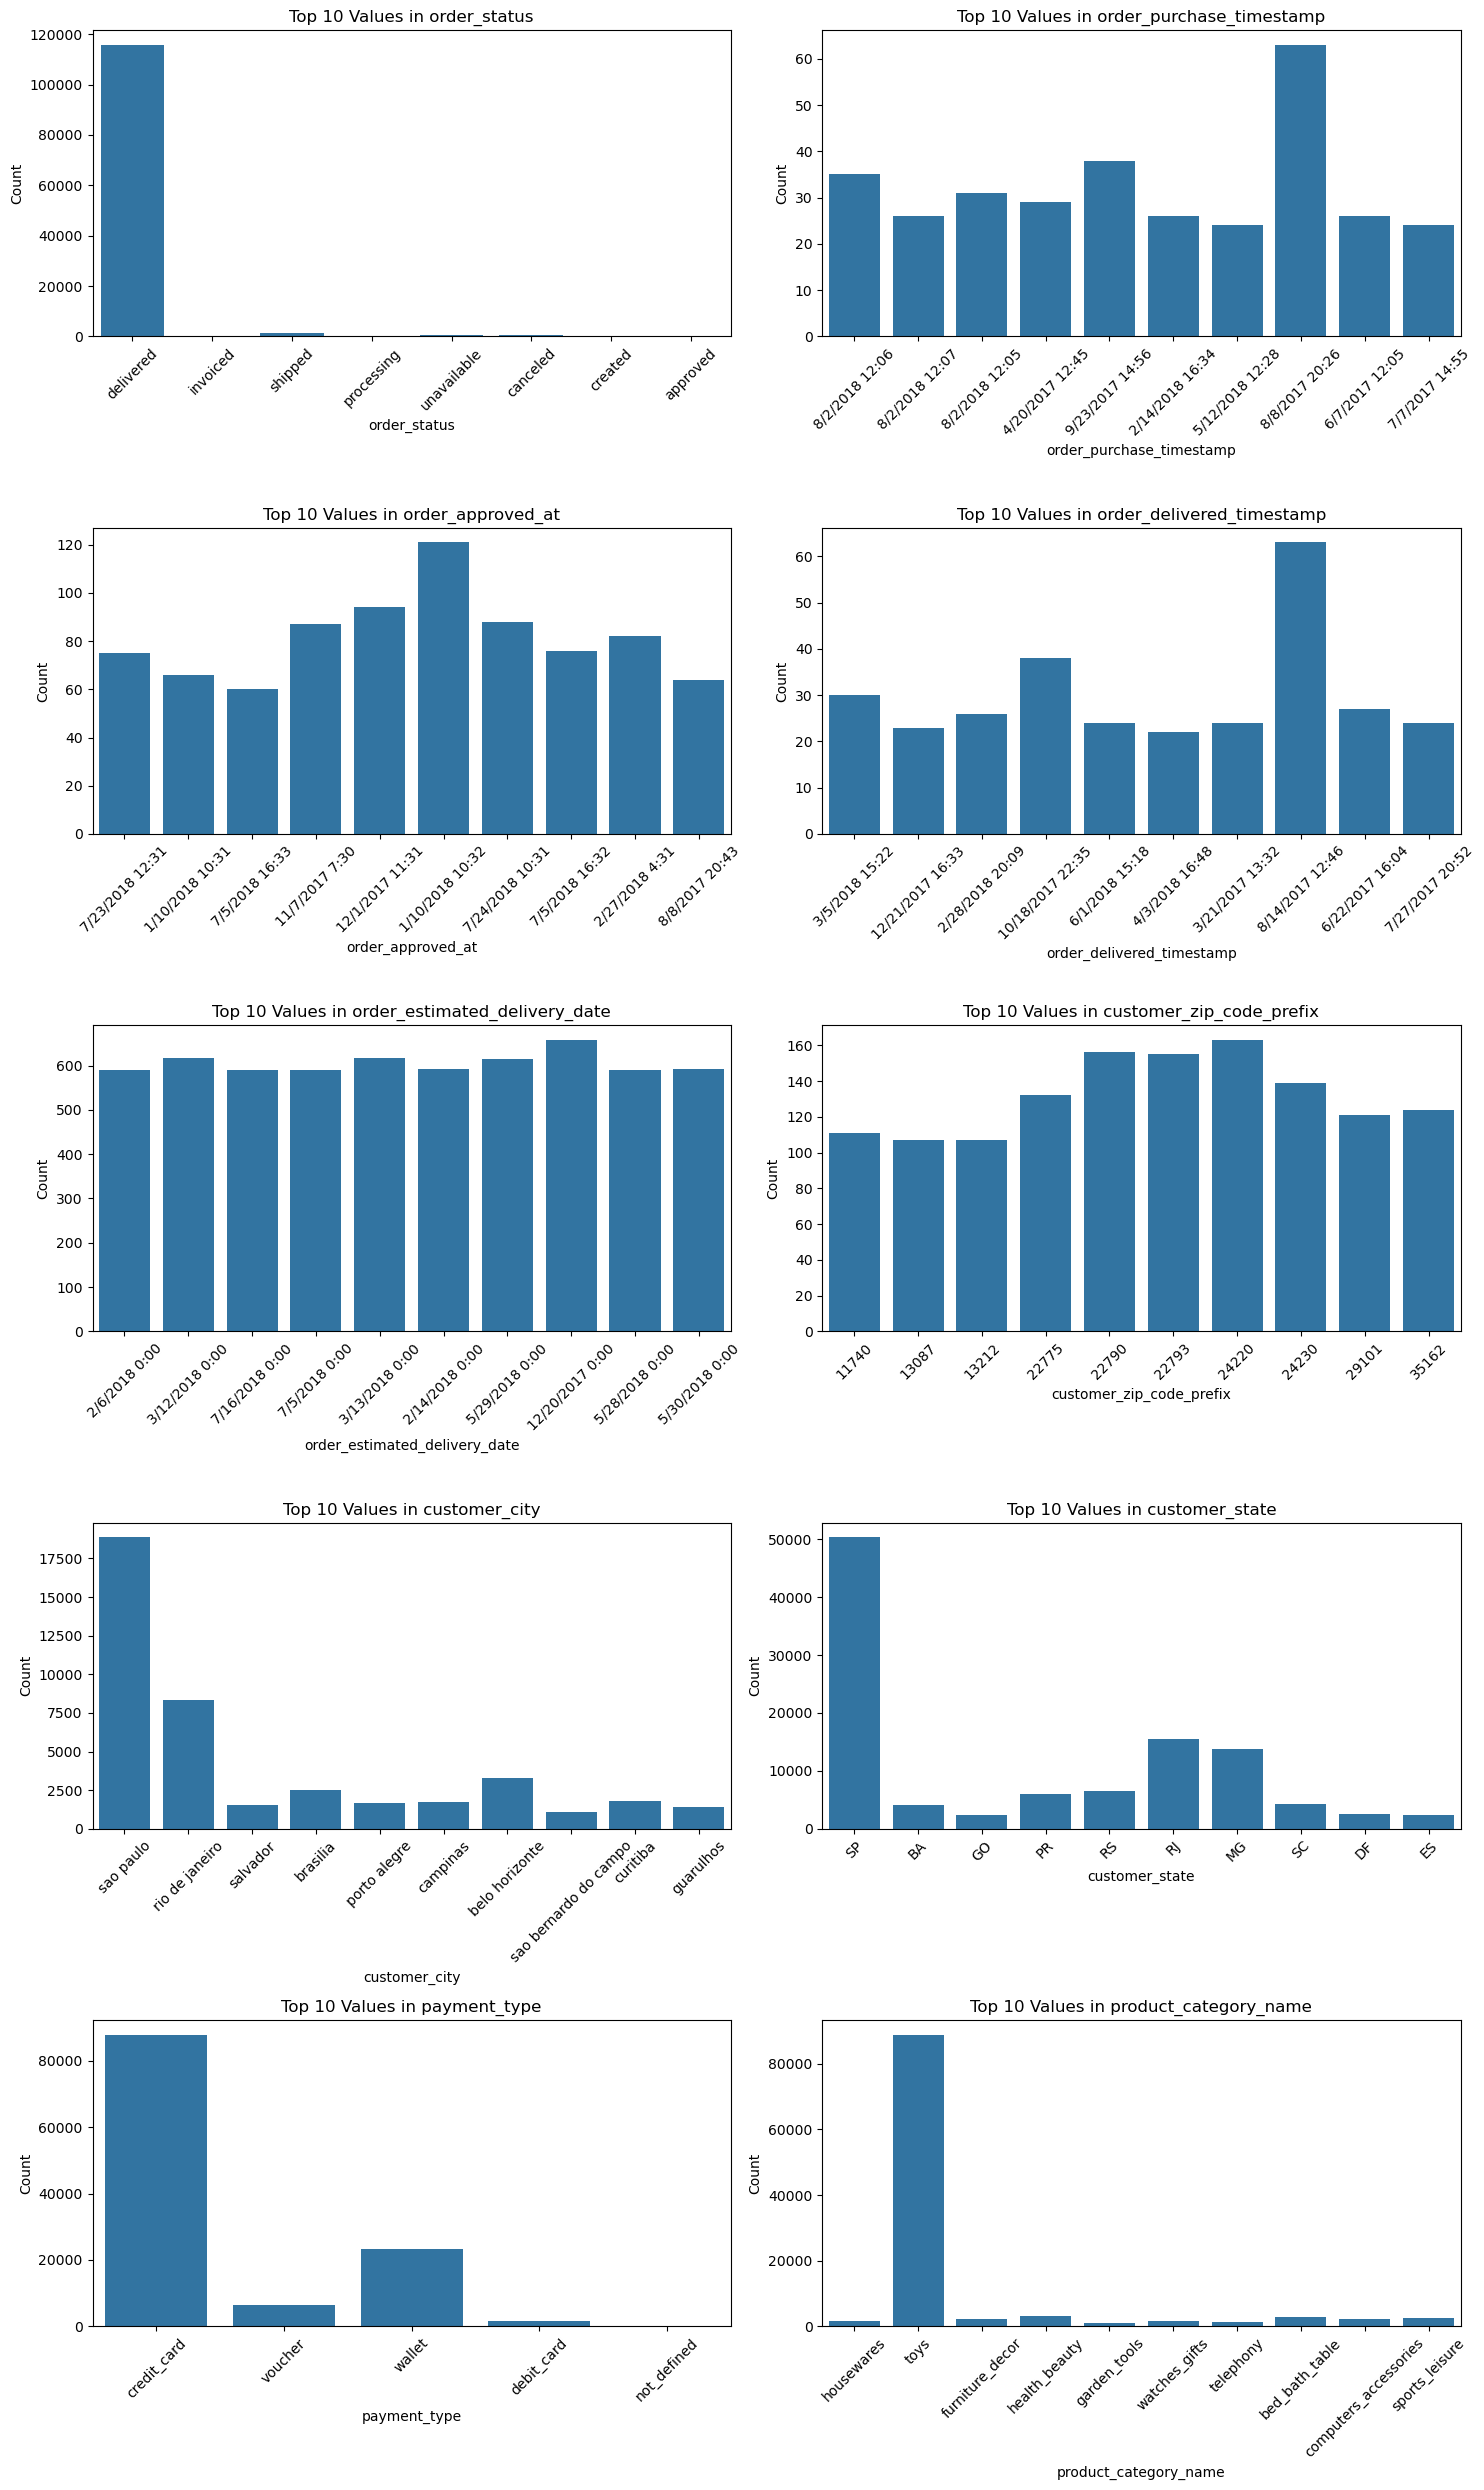

In [20]:
# 범주형 countplot 상위 10개의 값만 시각화

rows = 5
cols = 2

# 플롯 크기 설정
fig, axes = plt.subplots(rows, cols, figsize=(15, 25))

# 모든 플롯을 차지할 수 있도록 축 배열 평탄화
axes = axes.flatten()

# 각 범주형 변수에 대해 상위 10개 값의 countplot 그리기
for i, col in enumerate(categorical_cols):
    top_10_values = merge_df[col].value_counts().nlargest(10).index
    sns.countplot(data=merge_df[merge_df[col].isin(top_10_values)], x=col, ax=axes[i])
    axes[i].set_title(f'Top 10 Values in {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 3. Data Preprocessing

## 3-1. 결측치 처리

In [21]:
# 결측치를 포함하는 column

merge_df[missing_columns].isna().sum()

order_approved_at             178
order_delivered_timestamp    3422
order_item_id                 835
product_id                    835
seller_id                     835
price                         835
shipping_charges              835
payment_sequential              3
payment_type                    3
payment_installments            3
payment_value                   3
product_category_name        1267
product_weight_g              855
product_length_cm             855
product_height_cm             855
product_width_cm              855
dtype: int64

In [22]:
# missing_col_df에 대한 기술통계량

missing_col_df = merge_df[missing_columns]

missing_col_df.describe(include='all')

order_approved_at order_delivered_timestamp  order_item_id  \
count             118982                    115738  118325.000000   
unique             50462                     75649            NaN   
top      1/10/2018 10:32           8/14/2017 12:46            NaN   
freq                 121                        63            NaN   
mean                 NaN                       NaN       1.196569   
std                  NaN                       NaN       0.699144   
min                  NaN                       NaN       1.000000   
25%                  NaN                       NaN       1.000000   
50%                  NaN                       NaN       1.000000   
75%                  NaN                       NaN       1.000000   
max                  NaN                       NaN      21.000000   

                              product_id                         seller_id  \
count                             118325                            118325   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  4a3ca9315b744ce9f8e9374361493884   
freq                                 538                              2155   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

                price  shipping_charges  payment_sequential payment_type  \
count   118325.000000     118325.000000       119157.000000       119157   
unique            NaN               NaN                 NaN            5   
top               NaN               NaN                 NaN  credit_card   
freq              NaN               NaN                 NaN        87795   
mean       120.729200         20.037466            1.094178          NaN   
std        184.130919         15.847918            0.726675          NaN   
min          0.850000          0.000000            1.000000          NaN   
25%         39.900000         13.080000            1.000000          NaN   
50%         74.900000         16.280000            1.000000          NaN   
75%        134.900000         21.190000            1.000000          NaN   
max       6735.000000        409.680000           29.000000          NaN   

        payment_installments  payment_value product_category_name  \
count          119157.000000  119157.000000                117893   
unique                   NaN            NaN                    70   
top                      NaN            NaN                  toys   
freq                     NaN            NaN                 88791   
mean                2.941053     172.825878                   NaN   
std                 2.777111     267.813648                   NaN   
min                 0.000000       0.000000                   NaN   
25%                 1.000000      60.890000                   NaN   
50%                 2.000000     108.210000                   NaN   
75%                 4.000000     189.260000                   NaN   
max                24.000000   13664.080000                   NaN   

        product_weight_g  product_length_cm  product_height_cm  \
count      118305.000000      118305.000000      118305.000000   
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean         2113.957364          30.254537          16.633143   
std          3789.273735          16.189991          13.453618   
min             0.000000           7.

In [23]:
# missing_columns에 대한 value_counts

for col in missing_col_df.columns:
    print(missing_col_df[col].value_counts().to_frame().join(missing_col_df[col].value_counts(normalize=True).to_frame().cumsum()))
    print("=" * 50)

                   count  proportion
order_approved_at                   
1/10/2018 10:32      121    0.001017
12/1/2017 11:31       94    0.001807
7/24/2018 10:31       88    0.002547
11/7/2017 7:30        87    0.003278
2/27/2018 4:31        82    0.003967
...                  ...         ...
8/23/2017 20:15        1    0.999966
7/3/2017 16:30         1    0.999975
7/28/2018 0:25         1    0.999983
10/7/2016 23:13        1    0.999992
9/14/2017 12:30        1    1.000000

[50462 rows x 2 columns]
                           count  proportion
order_delivered_timestamp                   
8/14/2017 12:46               63    0.000544
10/18/2017 22:35              38    0.000873
3/5/2018 15:22                30    0.001132
6/22/2017 16:04               27    0.001365
2/28/2018 20:09               26    0.001590
...                          ...         ...
1/31/2018 19:16                1    0.999965
11/8/2017 13:42                1    0.999974
6/5/2018 0:44                  1    0.99998

### order_approved_at

In [24]:
# 'order_approved_at' 컬럼에서 결측치가 포함된 행만 추출
missing_rows = merge_df[merge_df['order_approved_at'].isna()]

# 'order_status' 컬럼의 value_counts
order_status_counts = missing_rows['order_status'].value_counts()
print("Order Status Counts:")
print(order_status_counts)



Order Status Counts:
order_status
canceled     158
delivered     15
created        5
Name: count, dtype: int64


- canceled 인 경우 당연하게도 주문이 승인이 되지 않기 때문에 결측치가 발생하고 있었다. 
- delivered 됐는데 승인이 되지 않은 경우가 15건 있는데, 시스템 오류로 발생한 결측치로 보는 것이 타당하다고 생각.
- created 또한 마찬가지로 시스템 오류로 보는 것이 합당할 듯

결론: order_approved_at 의 결측치는 178개인데, 전체 데이터에 비하면 그 비율이 너무 작기에 그것을 알아내는 비용이 이유를 알아냈을 때 얻을 수 있는 이득보다 더 클 것이라 생각되어 <u>행을 제거하면 어떨까?</u>

### order_delivered_timestamp

In [25]:
# 'order_approved_at' 컬럼에서 결측치가 포함된 행만 추출
missing_rows = merge_df[merge_df['order_delivered_timestamp'].isna()]

# 'order_status' 컬럼의 value_counts
order_status_counts = missing_rows['order_status'].value_counts()
print("Order Status Counts:")
print(order_status_counts)

Order Status Counts:
order_status
shipped        1257
canceled        745
unavailable     653
processing      376
invoiced        375
delivered         8
created           5
approved          3
Name: count, dtype: int64


order_status가 delivered 가 아닌 경우 당연하게도 배송된 시점의 타임스탬프는 비어있어야한다. 문제는 delivered 됐는데도 타임스탬프가 비어있는 경우이다.
- 하지만 그 개수가 8개로 행 제거.
- 그리고 나머지 status에 대해서 결측치가 있는 부분은 전자상거래 도메인에 대한 이해가 필요할거 같다.

결론: delivered를 제외한 나머지 상태에서는 아직 도착하지 않았으니 비어있는게 당연하다. 그리고 결측치 개수가 3,422개로 전체 데이터와 비교하면 약 3%정도 된다. 따라서 <u>비어있는 부분은 그대로 두고 나머지 데이터들에 대해서만 분석을 진행해도 되지 않을까?</u>

### order_item_id ~ shipping_charges

- order_item_id, product_id, seller_id, price, shipping_charges 


In [26]:
# columns_to_check에 대한 결측치들이 모두 835개로 서로 관계가 있을 것이라 생각해 같이 살펴보기로 함.


# 체크할 컬럼들 정의
columns_to_check = ['order_item_id', 'product_id', 'seller_id', 'price', 'shipping_charges']

# 각 컬럼에 대해 결측치가 포함된 행들의 'order_status'에 대한 value_counts 계산
for column in columns_to_check:
    # 각 컬럼에 대해 결측치가 있는 행만 필터링
    missing_rows = merge_df[merge_df[column].isna()]
    
    # 해당 행들의 'order_status' value_counts 계산
    order_status_counts = missing_rows['order_status'].value_counts()
    
    # 결과 출력
    print(f"Order Status Value Counts for Rows with Missing '{column}':")
    print(order_status_counts)
    print("-" * 50)  # 구분선 출력

Order Status Value Counts for Rows with Missing 'order_item_id':
order_status
unavailable    646
canceled       181
created          5
invoiced         2
shipped          1
Name: count, dtype: int64
--------------------------------------------------
Order Status Value Counts for Rows with Missing 'product_id':
order_status
unavailable    646
canceled       181
created          5
invoiced         2
shipped          1
Name: count, dtype: int64
--------------------------------------------------
Order Status Value Counts for Rows with Missing 'seller_id':
order_status
unavailable    646
canceled       181
created          5
invoiced         2
shipped          1
Name: count, dtype: int64
--------------------------------------------------
Order Status Value Counts for Rows with Missing 'price':
order_status
unavailable    646
canceled       181
created          5
invoiced         2
shipped          1
Name: count, dtype: int64
--------------------------------------------------
Order Status Va

역시 columns_to_check에 해당하는 모든 컬럼들은 order_status의 영향을 받고 있었다.
- 그 중에서도 총 835개 중 646개가 unavailable에 속했다.
    - unavailable에 속할 경우를 아래와 같이 살펴보면 order_purchase_timestamp, order_approved_at 에는 값이 있는 것으로 보아 <u>판매자 측에서 재고 부족 등의 문제로 취소를 한 경우에 해당한다고 생각.</u>
- canceled도 살펴봤을 때 order_purchase_timestamp, order_approved_at에 값이 있는 것으로 보아 본인이 취소한 경우에 속할 것이다. 

결론: 이러한 결과들로 살펴봤을 때 <u>본 프로젝트에서는 유효한 주문에 대해서만 분석을 진행하기 위해 835개의 행을 모두 제거하는 것이 좋지 않을까 생각</u>

In [27]:
merge_df[merge_df['order_status'] == 'unavailable'].head(3)

order_id                       customer_id  \
320  8e24261a7e58791d10cb1bf9da94df5c  41fc647b8c6bd979b1b6364b60471b50   
701  c272bcd21c287498b4883c7512019702  0e634b16e4c585acbd7b2e8276ce6677   
823  37553832a3a89c9b2db59701c357ca67  596ed6d7a35890b3fbac54ec01f69685   

    order_status order_purchase_timestamp order_approved_at  \
320  unavailable         11/16/2017 15:09  11/16/2017 15:26   
701  unavailable          1/31/2018 11:31   1/31/2018 14:23   
823  unavailable          8/14/2017 17:38    8/17/2017 0:15   

    order_delivered_timestamp order_estimated_delivery_date  \
320                       NaN                12/5/2017 0:00   
701                       NaN                2/16/2018 0:00   
823                       NaN                 9/5/2017 0:00   

     customer_zip_code_prefix     customer_city customer_state  ...  \
320                     89288  sao bento do sul             SC  ...   
701                     11701      praia grande             SP  ...   
823                      2318         sao paulo             SP  ...   

     shipping_charges payment_sequential payment_type  payment_installments  \
320               NaN                1.0  credit_card                   5.0   
701               NaN                1.0  credit_card                   1.0   
823               NaN                1.0       wallet                   1.0   

     payment_value  product_category_name product_weight_g  product_length_cm  \
320          84.00                    NaN              NaN                NaN   
701          97.68                    NaN              NaN                NaN   
823         132.46                    NaN              NaN                NaN   

     product_height_cm product_width_cm  
320                NaN              NaN  
701                NaN              NaN  
823                NaN              NaN  

[3 rows x 24 columns]

In [28]:
merge_df[merge_df['order_status'] == 'canceled'].head(3)

order_id                       customer_id  \
471   1b9ecfe83cdc259250e1a8aca174f0ad  8ea097b1824dbd4d17af71b0afe04301   
737   714fb133a6730ab81fa1d3c1b2007291  c4ebedb09beb89cc0314c5c0c33f8053   
1267  3a129877493c8189c59c60eb71d97c29  11c3d6c93dea6ce86769a4835c171bd9   

     order_status order_purchase_timestamp order_approved_at  \
471      canceled           8/4/2018 14:29     8/7/2018 4:10   
737      canceled          1/26/2018 21:34   1/26/2018 21:58   
1267     canceled          1/25/2018 13:34   1/25/2018 13:50   

     order_delivered_timestamp order_estimated_delivery_date  \
471                        NaN                8/14/2018 0:00   
737                        NaN                2/22/2018 0:00   
1267                       NaN                2/23/2018 0:00   

      customer_zip_code_prefix customer_city customer_state  ...  \
471                       5514     sao paulo             SP  ...   
737                       9961       diadema             SP  ...   
1267                     87013       maringa             PR  ...   

      shipping_charges payment_sequential payment_type  payment_installments  \
471               8.34                1.0       wallet                   1.0   
737              26.11                1.0  credit_card                   4.0   
1267             15.10                1.0  credit_card                   1.0   

      payment_value  product_category_name product_weight_g  \
471           33.34                   toys            350.0   
737           96.01                   toys          12300.0   
1267          14.12                   toys            329.0   

      product_length_cm  product_height_cm product_width_cm  
471                22.0               11.0             17.0  
737                40.0               40.0             40.0  
1267               20.0               16.0             18.0  

[3 rows x 24 columns]

### payment_sequential ~ payment_value 

- payment_sequential, payment_type, payment_installments, payment_value

In [29]:
# columns_to_check2에 대한 결측치들이 모두 3개로 서로 관계가 있을 것이라 생각해 같이 살펴보기로 함.

columns_to_check2 = ['payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

merge_df[merge_df[columns_to_check2].isna().any(axis=1)]


order_id                       customer_id  \
36884  bfbd0f9bdef84302105ad712db648a6c  830d5b7aaa3b6f1e9ad63703bec97d23   
36885  bfbd0f9bdef84302105ad712db648a6c  830d5b7aaa3b6f1e9ad63703bec97d23   
36886  bfbd0f9bdef84302105ad712db648a6c  830d5b7aaa3b6f1e9ad63703bec97d23   

      order_status order_purchase_timestamp order_approved_at  \
36884    delivered          9/15/2016 12:16   9/15/2016 12:16   
36885    delivered          9/15/2016 12:16   9/15/2016 12:16   
36886    delivered          9/15/2016 12:16   9/15/2016 12:16   

      order_delivered_timestamp order_estimated_delivery_date  \
36884            11/9/2016 7:47                10/4/2016 0:00   
36885            11/9/2016 7:47                10/4/2016 0:00   
36886            11/9/2016 7:47                10/4/2016 0:00   

       customer_zip_code_prefix         customer_city customer_state  ...  \
36884                     14600  sao joaquim da barra             SP  ...   
36885                     14600  sao joaquim da barra             SP  ...   
36886                     14600  sao joaquim da barra             SP  ...   

       shipping_charges payment_sequential payment_type  payment_installments  \
36884              2.83                NaN          NaN                   NaN   
36885              2.83                NaN          NaN                   NaN   
36886              2.83                NaN          NaN                   NaN   

       payment_value  product_category_name product_weight_g  \
36884            NaN                   toys           1000.0   
36885            NaN                   toys           1000.0   
36886            NaN                   toys           1000.0   

       product_length_cm  product_height_cm product_width_cm  
36884               16.0               16.0             16.0  
36885               16.0               16.0             16.0  
36886               16.0               16.0             16.0  

[3 rows x 24 columns]

데이터를 살펴봤을 때 완전히 동일한 데이터이다.

결론: 행 제거

### product_category_name

In [30]:
# product_category_name이 결측치인 행의 product_id 추출

product_ids = merge_df[merge_df['product_category_name'].isna()]['product_id'].tolist()
product_ids

['71225f49be70df4297892f6a5fa62171',
 '9820e04e332fc450d6fd975befc1bc28',
 nan,
 nan,
 nan,
 '0ae10ca52e6cb8745e17c11e7c43907c',
 nan,
 nan,
 nan,
 'c4d92c32b2e02363d3f087c7156a523c',
 '45a15b38cc3c0514717a1de673c6193c',
 nan,
 '3373d1ed7bf5f3187f110c0e9e40a02b',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '0105b5323d24fc655f73052694dbbb3a',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '15f773b4fea5b2ab681b02620b0c3a95',
 '15f773b4fea5b2ab681b02620b0c3a95',
 nan,
 nan,
 nan,
 nan,
 '17823ffd2de8234f0e885a71109613a4',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '6627f494b45486e462e2bb460fcb18e5',
 'f58e45b16a42a325c144eb2c46a2bc57',
 '06ddfdf210c7e0259854ee543215088d',
 'b61d1388a17e3f547d2bc218df02335b',
 'fcde1899043318107d8f0ae043f69bc3',
 nan,
 nan,
 nan,
 nan,
 nan,
 '817a68e75e8fc94fa28915d8169d67bf',
 nan,
 nan,
 'c7858457bc43561ccb96aaa2932cb085',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '6ad6cc284cdcc1cdd2f06eef8d983913',
 '56139431d72cd51f19eb9f7dae4d1617',
 nan,
 nan,
 na

In [31]:
# product_ids 리스트에 있는 product_id들 중에서, product_category_name이 결측치가 아닌 행들을 필터링

filtered_df = merge_df[merge_df['product_id'].isin(product_ids) & merge_df['product_category_name'].notna()]
filtered_df


Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_timestamp, order_estimated_delivery_date, customer_zip_code_prefix, customer_city, customer_state, order_item_id, product_id, seller_id, price, shipping_charges, payment_sequential, payment_type, payment_installments, payment_value, product_category_name, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []

[0 rows x 24 columns]

product_category_name에서 결측치를 포함하는 데이터의 product_id를 리스트로 뽑았다. 이 product_id 들에 대한 다른 행의 product_category_name 중 결측치가 아닌 것이 있을 수도 있지 않을까?
- 확인 결과 없었음.

결론: 해당 product_category_name은 아마 이제 더이상 판매하지 않는 제품들인거 같으므로, 삭제하는 것이 마땅하다고 생각.

### product_weight_g ~ product_width_cm

- product_weight_g, product_length_cm, product_height_cm, product_width_cm
- 해당 컬럼들에 대해서는 전체 데이터 개수 대비 0.71%로 매우 작기 때문에 중앙값으로 대체
    - 극단값의 영향을 줄이기 위해


### 최종 결측치 처리하는 코드

In [32]:
# 각 컬럼의 중앙값으로 결측치를 채우기 [product_weight_g, product_length_cm, product_height_cm, product_width_cm]
merge_df['product_weight_g'].fillna(merge_df['product_weight_g'].median(), inplace=True)
merge_df['product_length_cm'].fillna(merge_df['product_length_cm'].median(), inplace=True)
merge_df['product_height_cm'].fillna(merge_df['product_height_cm'].median(), inplace=True)
merge_df['product_width_cm'].fillna(merge_df['product_width_cm'].median(), inplace=True)

# 결측치를 제거할 열 목록
columns_to_drop_null= [
    'order_approved_at', 
    'order_item_id', 
    'product_id', 
    'seller_id', 
    'price', 
    'shipping_charges', 
    'payment_sequential', 
    'payment_type', 
    'payment_installments', 
    'payment_value', 
    'product_category_name'
]

# 지정된 열들에서 결측치가 있는 행을 제거
merge_df = merge_df.dropna(subset=columns_to_drop_null)

# 분석 프로젝트에 필요 없다고 판단한 컬럼 제거
columns_to_drop = ['payment_sequential']
merge_df = merge_df.drop(columns=columns_to_drop)

merge_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_timestamp        2566
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
shipping_charges                    0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name               0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
dtype: int64

order_delivered_timestamp를 제외한 나머지 컬럼들 결측치 처리 완료

## 3-2. 이상치 처리

위에서 살펴봤던 것처럼 모든 수치형 변수들에 이상치가 있는 것으로 확인되어 이상치 처리가 필요한 상황이다.

In [33]:
numerical_df.describe(include='all')

order_item_id          price  shipping_charges  payment_sequential  \
count  118325.000000  118325.000000     118325.000000       119157.000000   
mean        1.196569     120.729200         20.037466            1.094178   
std         0.699144     184.130919         15.847918            0.726675   
min         1.000000       0.850000          0.000000            1.000000   
25%         1.000000      39.900000         13.080000            1.000000   
50%         1.000000      74.900000         16.280000            1.000000   
75%         1.000000     134.900000         21.190000            1.000000   
max        21.000000    6735.000000        409.680000           29.000000   

       payment_installments  payment_value  product_weight_g  \
count         119157.000000  119157.000000     118305.000000   
mean               2.941053     172.825878       2113.957364   
std                2.777111     267.813648       3789.273735   
min                0.000000       0.000000          0.000000   
25%                1.000000      60.890000        300.000000   
50%                2.000000     108.210000        700.000000   
75%                4.000000     189.260000       1800.000000   
max               24.000000   13664.080000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  
count      118305.000000      118305.000000     118305.000000  
mean           30.254537          16.633143         23.066692  
std            16.189991          13.453618         11.743808  
min             7.000000           2.000000          6.000000  
25%            18.000000           8.000000         15.000000  
50%            25.000000          13.000000         20.000000  
75%            38.000000          20.000000         30.000000  
max           105.000000         105.000000        118.000000

In [34]:
# 수치형 변수에 대한 value_counts

numerical_cols = ['order_item_id', 'price', 'shipping_charges', 'payment_installments', 'payment_value',
                           'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
numerical_df = merge_df[numerical_cols]

for col in numerical_df.columns:
    print(numerical_df[col].value_counts().to_frame().join(numerical_df[col].value_counts(normalize=True).to_frame().cumsum()))
    print("=" * 50)

                count  proportion
order_item_id                    
1.0            103276    0.876148
2.0             10268    0.963258
3.0              2388    0.983516
4.0               991    0.991924
5.0               471    0.995919
6.0               262    0.998142
7.0                62    0.998668
8.0                36    0.998973
9.0                29    0.999220
10.0               26    0.999440
11.0               17    0.999584
12.0               13    0.999695
13.0                8    0.999762
14.0                7    0.999822
15.0                5    0.999864
16.0                3    0.999890
17.0                3    0.999915
18.0                3    0.999941
19.0                3    0.999966
20.0                3    0.999992
21.0                1    1.000000
         count  proportion
price                     
59.90     2623    0.022252
69.90     2115    0.040195
49.90     2035    0.057459
89.90     1628    0.071270
99.90     1522    0.084182
...        ...         ...
21

### order_item_id

order_item_id에 대한 value_counts를 살펴보면 
- 1일 때의 개수가 103,276개로 누적합 약 87.6%를 차지하고 있다.
- 또한 2일 때의 개수가 10,268개로 전체의 약 10%에 해당한다.

결론: 따라서, 1개를 구매한 경우와 2개 이상을 구매한 경우로 이진화하는 방법으로 범주형 변수로 변환하는 것이 나을 것이라 생각
- 1개를 구매한 경우 1, 2개 이상을 구매한 경우를 0으로 변환
- 이진화를 할 경우 불균형 문제를 어느정도 해결할 수 있을 것.

In [35]:
def binarize(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 1 if x == 1 else 0)
    return df

### price

우측으로 꼬리가 긴 right-skewed 분포를 가지기 때문에 모델링에 부정적인 영향을 미칠 수 있다. 

결론: 따라서, right-skewed 분포를 가져 극단값이 클러스터링 결과에 큰 영향을 미칠 수 있는 이러한 경우에 사용하면 효과적인 IQR 방법으로 이상치 제거.

In [36]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

### payment_sequential

결론: payment_sequential의 경우 누적합 95%의 값이 1에 집중되어 있다. 따라서, 빈도수가 낮은 값들이 데이터의 왜곡을 초래할 수 있기 때문에, 빈도 기반 필터링을 통해 빈도수가 적은 결제 순서 값을 제거.

In [37]:
def remove_low_frequency_outliers(df, column_name, min_frequency=0.01):
    value_counts = df[column_name].value_counts()
    proportions = value_counts / len(df)
    
    valid_values = proportions[proportions >= min_frequency].index
    
    df_cleaned = df[df[column_name].isin(valid_values)]
    
    return df_cleaned

### payment_installments

결론: payment_installments는 1개월부터 12개월까지 거의 순서대로 나열되어 있으며, 누적합 액 99.8%를 차지한다.
- 따라서, 12개월 그 이상의 할부 개월은 이상치로 보고 필터링.

In [38]:
def remove_outliers_by_threshold(df, column_name, threshold):
    df_cleaned = df[df[column_name] <= threshold]
    
    return df_cleaned

### payment_value

결론: price와 연관이 있는 변수로 동일하게 IQR 방법으로 제거.

### shipping_charges

결론: IQR 방법으로 처리

### product_weight_g, product_length_cm, product_height_cm, product_width_cm


결론: 위에서 boxplot을 살펴봤을 때 IQR이 적절해보임

### 최종 이상치 처리하는 코드

In [39]:
# 변수 이진화 함수
def binarize(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 1 if x == 1 else 0)
    return df

# IQR 제거 방식
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

# 빈도수 기반 필터링 함수
def remove_low_frequency_outliers(df, column_name, min_frequency=0.01):
    value_counts = df[column_name].value_counts()
    proportions = value_counts / len(df)
    
    valid_values = proportions[proportions >= min_frequency].index
    
    df_cleaned = df[df[column_name].isin(valid_values)]
    
    return df_cleaned

def remove_outliers_by_threshold(df, column_name, threshold):
    df_cleaned = df[df[column_name] <= threshold]
    
    return df_cleaned


# order_item_id 1개는 1로, 2개 이상은 0으로 이진화하는 코드
merged_df_cleaned = binarize(merge_df, 'order_item_id')

# price, shipping_charges, payment_value IQR 방법으로 처리
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'price')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'shipping_charges')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'payment_value')

# payment_installments 12개월 초과는 필터링
merged_df_cleaned = remove_outliers_by_threshold(merged_df_cleaned, 'payment_installments', 12)

# product_weight_g, product_length_cm, product_height_cm, product_width_cm IQR 방법으로 처리
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'product_weight_g')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'product_length_cm')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'product_height_cm')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'product_width_cm')

In [40]:
# 이상치, 결측치 처리한 데이터

merged_df_cleaned.to_csv('merged_df_cleaned.csv', index=False)
merged_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77871 entries, 0 to 119159
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       77871 non-null  object 
 1   customer_id                    77871 non-null  object 
 2   order_status                   77871 non-null  object 
 3   order_purchase_timestamp       77871 non-null  object 
 4   order_approved_at              77871 non-null  object 
 5   order_delivered_timestamp      76297 non-null  object 
 6   order_estimated_delivery_date  77871 non-null  object 
 7   customer_zip_code_prefix       77871 non-null  int64  
 8   customer_city                  77871 non-null  object 
 9   customer_state                 77871 non-null  object 
 10  order_item_id                  77871 non-null  int64  
 11  product_id                     77871 non-null  object 
 12  seller_id                      77871 non-null  obj

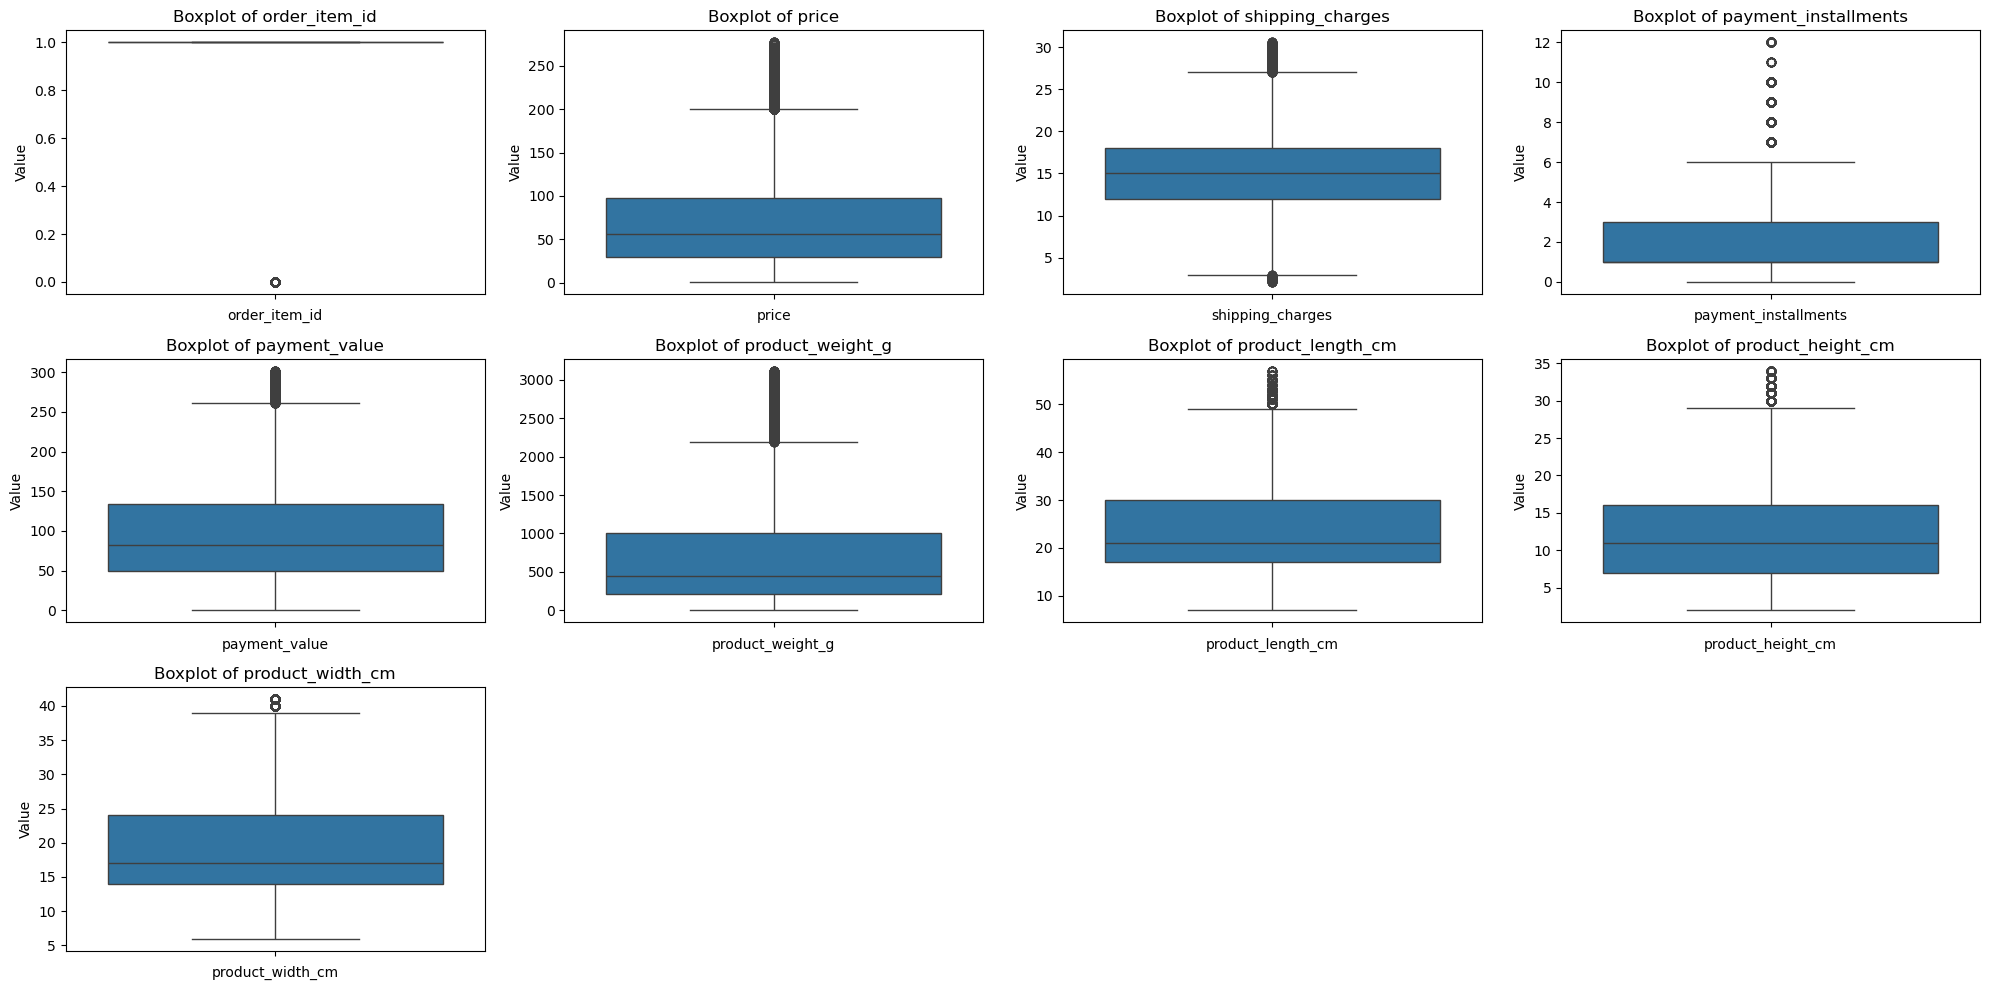

In [41]:
plt.figure(figsize=(20, 10))

for idx, col in enumerate(numerical_cols):
    plt.subplot(3, 4, idx+1)
    sns.boxplot(y=merged_df_cleaned[col])  
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col) 
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

## 3-3 변수 스케일링

### 3-3-1. 수치형 변수 스케일링

현재 수치형 변수가 오른쪽으로 꼬리가 긴 right-skewed 분포를 가지고 있다. 따라서, 로그변환 방법으로 변수들을 조금 더 정규분포에 더 가깝게 만들어 비대칭성을 줄인다. 

이후 정규화(Normalization)을 통해 데이터의 범위를 일정한 구간으로 변환하여 모델의 학습 속도와 성능을 높이고자 한다.
- KNN과 같은 거리 기반 알고리즘에서는 변수 간의 값의 범위가 일치하지 않으면 거리 계산에서 문제가 발생할 수 있는데, 정규화를 통해 해결 가능.

### 'product_length_cm', 'product_height_cm', 'product_width_cm' 
세 개의 컬럼을 곱해서 부피 컬럼을 만들고 기존 3 개의 컬럼은 드랍.

In [42]:
# 'product_length_cm', 'product_height_cm', 'product_width_cm' 곱해서 'volume' 컬럼 생성
merged_df_cleaned['volume'] = merged_df_cleaned['product_length_cm'] * merged_df_cleaned['product_height_cm'] * merged_df_cleaned['product_width_cm']

# 기존의 세 개의 컬럼 드랍
merged_df_cleaned = merged_df_cleaned.drop(columns=['product_length_cm', 'product_height_cm', 'product_width_cm'])

merged_df_cleaned.head(10)

order_id                       customer_id  \
0   e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1   e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2   e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
3   53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
4   47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
5   949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
6   ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   
9   6514b8ad8028c9f2cc2374ded245783f  932afa1e708222e5821dac9cd5db4cae   
15  34513ce0c4fab462a55830c0989c7edb  782987b81c92239d922aa49d6bd4200b   
16  82566a660a982b15fb86e904c8d32918  e97109680b052ee858d93a539597bba7   

   order_status order_purchase_timestamp order_approved_at  \
0     delivered          10/2/2017 10:56   10/2/2017 11:07   
1     delivered          10/2/2017 10:56   10/2/2017 11:07   
2     delivered          10/2/2017 10:56   10/2/2017 11:07   
3     delivered          7/24/2018 20:41    7/26/2018 3:24   
4     delivered            8/8/2018 8:38     8/8/2018 8:55   
5     delivered         11/18/2017 19:28  11/18/2017 19:45   
6     delivered          2/13/2018 21:18   2/13/2018 22:20   
9     delivered          5/16/2017 13:10   5/16/2017 13:22   
15    delivered          7/13/2017 19:58   7/13/2017 20:10   
16    delivered           6/7/2018 10:06     6/9/2018 3:13   

   order_delivered_timestamp order_estimated_delivery_date  \
0           10/10/2017 21:25               10/18/2017 0:00   
1           10/10/2017 21:25               10/18/2017 0:00   
2           10/10/2017 21:25               10/18/2017 0:00   
3             8/7/2018 15:27                8/13/2018 0:00   
4            8/17/2018 18:06                 9/4/2018 0:00   
5             12/2/2017 0:28               12/15/2017 0:00   
6            2/16/2018 18:17                2/26/2018 0:00   
9            5/26/2017 12:55                 6/7/2017 0:00   
15           7/19/2017 14:04                 8/8/2017 0:00   
16           6/19/2018 12:05                7/18/2018 0:00   

    customer_zip_code_prefix            customer_city customer_state  ...  \
0                       3149                sao paulo             SP  ...   
1                       3149                sao paulo             SP  ...   
2                       3149                sao paulo             SP  ...   
3                      47813                barreiras             BA  ...   
4                      75265               vianopolis             GO  ...   
5                      59296  sao goncalo do amarante             RN  ...   
6                       9195              santo andre             SP  ...   
9                      26525                nilopolis             RJ  ...   
15                      4278                sao paulo             SP  ...   
16                     35400               ouro preto             MG  ...   

                          product_id                         seller_id  \
0   87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1   87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2   87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3   595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4   aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
5   d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
6   65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
9   4520766ec412348b8d4caa5e8a18c464  16090f2ca825584b5a147ab24aa30c86   
15  f7e0fa615b386bc9a8b9eb52bc1fff76  87142160b41353c4e5fca2360caf6f92   
16  72a97c271b2e429974398f46b93ae530  094ced053e257ae8cae57205592d6712   

     price  shipping_charges  payment_type payment_installments  \
0    29.99              8.72   credit_card                  1.0   
1    29.99              8.72       voucher        

### 고객별 재구매 횟수, 구매 총 상품 금액, 구매 평균 금액, 총 결제액, 평균 결제 액

In [43]:
merged_df_cleaned['repeat_order'] = merged_df_cleaned.groupby('customer_id')['order_id'].transform('nunique')
merged_df_cleaned['total_price'] = merged_df_cleaned.groupby('customer_id')['price'].transform('sum')
merged_df_cleaned['avg_price'] = merged_df_cleaned.groupby('customer_id')['price'].transform('mean')
merged_df_cleaned['total_payment_value'] = merged_df_cleaned.groupby('customer_id')['payment_value'].transform('sum')
merged_df_cleaned['avg_payment_value'] = merged_df_cleaned.groupby('customer_id')['payment_value'].transform('mean')

In [44]:
# 수치형, 범주형 변수 재정의

numerical_cols = ['price', 'shipping_charges', 'payment_value', 'product_weight_g', 'volume']
categorical_cols = ['order_status','customer_zip_code_prefix', 'customer_city', 'customer_state',
                    'order_item_id', 'payment_type', 'payment_installments', 'product_category_name']

In [45]:
# 수치형 변수 로그변환 함수

def log_transform(df, cols):
    df_log_transformed = df[cols].apply(lambda x: np.log1p(x))
    
    return df_log_transformed

def normalize(df, cols):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols, index=df.index)
    
    return df_normalized

# 로그 변환
log_transformed_df = log_transform(merged_df_cleaned, numerical_cols)

# 정규화 수행
normalized_df = normalize(log_transformed_df, numerical_cols)

# 결과를 원래 데이터프레임에 반영
merged_df_cleaned[numerical_cols] = normalized_df

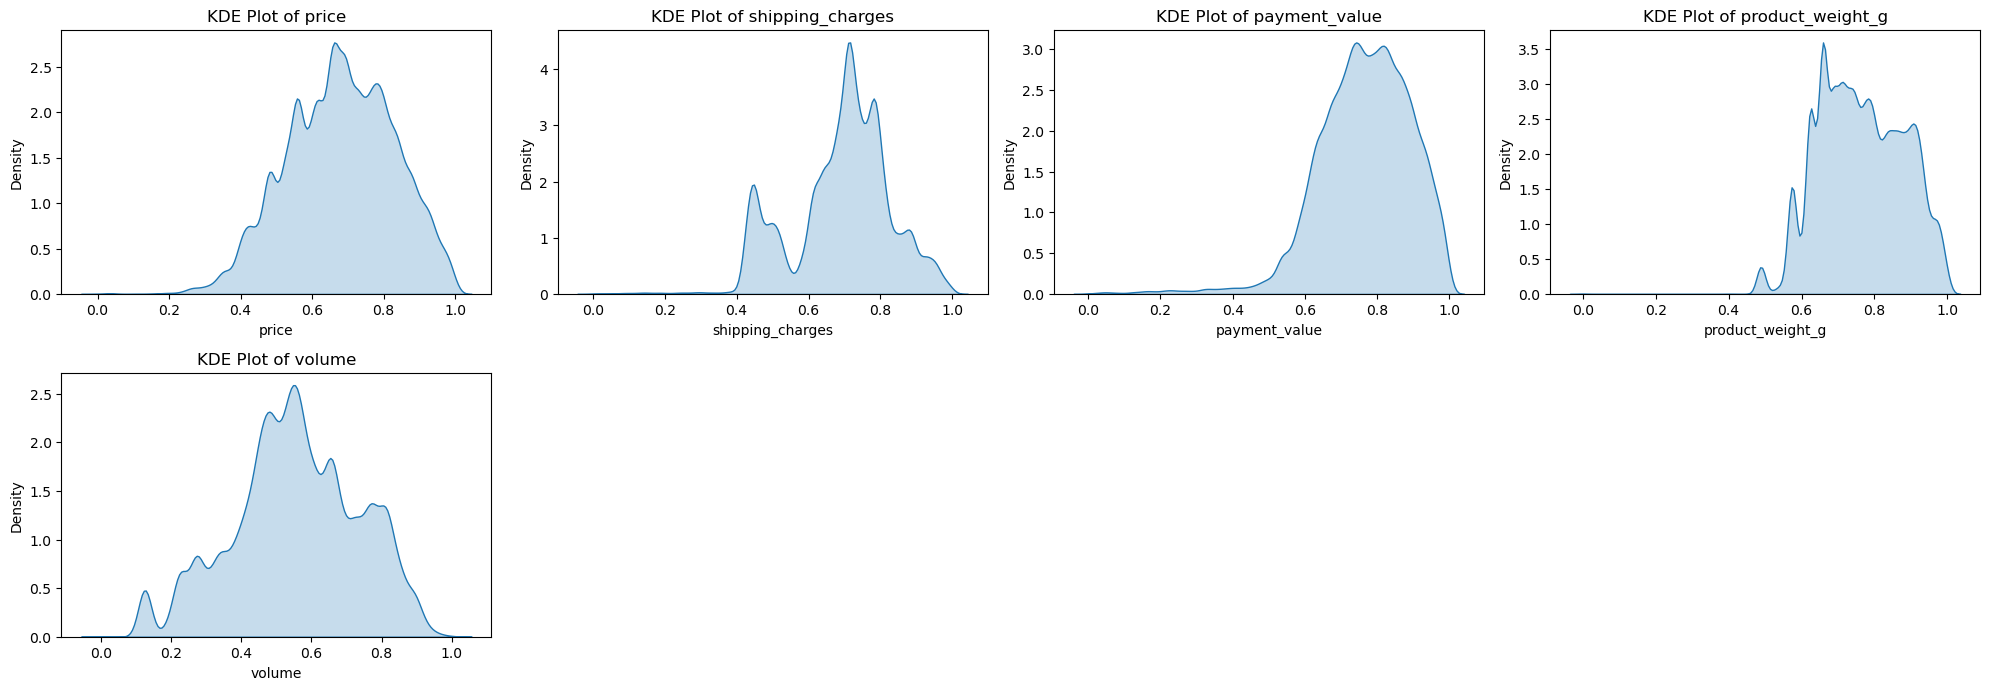

In [46]:
# 변수 스케일링 후 수치형 kdeplot()

plt.figure(figsize=(20, 10))

for idx, col in enumerate(numerical_cols):
    plt.subplot(3, 4, idx+1)
    ax = sns.kdeplot(merged_df_cleaned[col], shade=True)
    plt.title(f'KDE Plot of {col}')

plt.tight_layout()  
plt.show()


## 3-4. 범주형 변수 인코딩

One-Hot-Encoding : 각 카테고리를 0과 1로 구성된 벡터로 표현하는 기법. 카테고리의 수만큼 벡터가 생성되므로 각 카테고리가 새로운 변수가 되어 표현된다. 다만, 카테고리가 너무 많은 변수의 경우 데이터의 cardinality를 증가시켜 모델의 성능을 저하시킬 수 있다는 단점.

Label-Encoding : n개의 범주형 데이터를 0 ~ n-1의 연속적인 수치 데이터로 표현. 데이터의 범주가 3개 이상일 때는 주의해서 사용. 라벨 인코딩은 한번 실행시킬 때 단 하나의 컬럼만 실행 가능.

우리 데이터에는 범주형 변수가 많고, 예를들어 product_category_name에는 70개의 카테고리를 가지고 있기 때문에, 원-핫 인코딩과 라벨 인코딩을 사용하는 데는 한계가 있을 것으로 사료된다. 따라서, 다음의 두 가지를 고려한 인코딩 방법을 생각해야 할 것이다.
- 카디널리티 문제 : 원-핫 인코딩의 경우, 카테고리의 수가 많을수록 차원이 증가하여 데이터가 희소해지고, 계산 비용이 높아지며, 모델 성능이 저하될 수 있다.
- 거리 측정 문제: 라벨 인코딩은 범주형 데이터를 순서가 있는 수치 데이터로 변환하기 때문에, KNN과 같은 거리 기반 모델에서는 인코딩된 값 간의 인위적인 거리 차이가 생겨 잘못된 결과를 초래할 수 있다.

우리의 선택 : Label-Encoding
- 범주형 데이터가 많기는 하지만, 그 카테고리를 줄인 후 레이블 인코딩을 하고자 한다.

추가적으로 
- customer_zip_code_prefix, customer_city, customer_state와 같이 위치 정보를 나타내는 컬럼들은 따로 빼서 5개의 지방으로 묶는 과정이 필요.
    - 참고링크 : https://ko.wikipedia.org/wiki/%EB%B8%8C%EB%9D%BC%EC%A7%88%EC%9D%98_%EC%A3%BC
- 장난감도 카테고리가 70개나 되기 때문에 묶어서 줄이는 과정이 필요.
- 날짜 변수들 order_purchase_timestamp, order_approved_at, order_delivered_timestamp, order_estimated_delivery_date은 dtype을 datetime으로 변경해 향후 분석에 더욱 용이하게 사용할 수 있도록 한다.
- order_status, payment_type 레이블 인코딩

### customer_state, customer_zip_code_prefix, customer_city

In [47]:
# state로 5개의 지방으로 묶기

state_to_region = {
    'AC': '북부 지방', 'AL': '북동부 지방', 'AP': '북부 지방', 'AM': '북부 지방',
    'RR': '북부 지방', 'RO': '북부 지방', 'PA': '북부 지방', 'PB': '북동부 지방',
    'MA': '북동부 지방', 'PI': '북동부 지방', 'PE': '북동부 지방', 'RN': '북동부 지방',
    'CE': '북동부 지방', 'SE': '북동부 지방', 'BA': '북동부 지방', 'DF': '중서부 지방',
    'TO': '북부 지방', 'GO': '중서부 지방', 'MS': '중서부 지방', 'MT': '중서부 지방',
    'RJ': '남동부 지방', 'SP': '남동부 지방', 'MG': '남동부 지방', 'ES': '남동부 지방',
    'RS': '남부 지방', 'SC': '남부 지방', 'PR': '남부 지방'
}

# state 컬럼을 기준으로 지방으로 변환
merged_df_cleaned['region'] = merged_df_cleaned['customer_state'].map(state_to_region)

# customer_zip_code_prefix, customer_city, customer_state 컬럼 drop
columns_to_drop = ['customer_zip_code_prefix', 'customer_city', 'customer_state']
merged_df_cleaned = merged_df_cleaned.drop(columns=columns_to_drop)


In [48]:
# 결과 확인
merged_df_cleaned['region'].value_counts()

region
남동부 지방    55872
남부 지방     11141
북동부 지방     5471
중서부 지방     4463
북부 지방       924
Name: count, dtype: int64

region 맵핑:
- 남동부 지방 : 0
- 남부 지방  : 1
- 북동부 지방 : 2
- 북부 지방 : 3
- 중서부 지방 : 4

In [49]:
# 결과 확인했으니 이제 레이블 인코딩

label_encoder = LabelEncoder()

# 'region' 컬럼을 레이블 인코딩
merged_df_cleaned['region'] = label_encoder.fit_transform(merged_df_cleaned['region'])
merged_df_cleaned['region'].value_counts()

region
0    55872
1    11141
2     5471
4     4463
3      924
Name: count, dtype: int64

### product_category_name

In [50]:
# product_category_name 종류별로 묶어서 카테고리 줄이기

category_mapping = {
    '가구/인테리어': [
        'furniture_decor', 'furniture_living_room', 'furniture_bedroom', 
        'furniture_mattress_and_upholstery', 'kitchen_dining_laundry_garden_furniture', 
        'la_cuisine', 'flowers', 'cool_stuff', 'perfumery', 'party_supplies', 
        'bed_bath_table', 'market_place', 'home_construction', 'christmas_supplies'
    ],
    '패션': [
        'fashion_underwear_beach', 'fashion_bags_accessories', 'fashion_shoes', 
        'fashion_male_clothing', 'fashion_sport', 'fashion_childrens_clothes', 
        'fashio_female_clothing', 'housewares', 'watches_gifts'
    ],
    '전자제품': [
        'telephony', 'computers_accessories', 'audio', 'tablets_printing_image', 
        'cine_photo', 'musical_instruments', 'consoles_games', 'dvds_blu_ray', 
        'music', 'electronics', 'air_conditioning', 'small_appliances', 
        'home_appliances', 'home_appliances_2', 'small_appliances_home_oven_and_coffee', 
        'home_comfort_2', 'signaling_and_security', 'security_and_services', 
        'fixed_telephony'
    ],
    '건설/공구': [
        'construction_tools_construction', 'costruction_tools_garden', 
        'construction_tools_safety', 'construction_tools_lights', 
        'costruction_tools_tools', 'garden_tools'
    ],
    '생활용품': [
        'baby', 'diapers_and_hygiene', 'health_beauty', 'home_confort', 
        'luggage_accessories', 'auto', 'food', 'drinks', 'food_drink', 
        'sports_leisure', 'pet_shop', 'agro_industry_and_commerce'
    ],
    '문구/사무용품': [
        'stationery', 'office_furniture', 'books_technical', 
        'books_general_interest', 'books_imported', 'arts_and_craftmanship', 
        'art', 'industry_commerce_and_business'
    ],
    '장난감': ['toys']
}

# 카테고리 매핑을 수행하는 함수
def map_category(category_name):
    for main_category, subcategories in category_mapping.items():
        if category_name in subcategories:
            return main_category
    return '기타'  

# `product_category_name` 컬럼을 매핑하여 새로운 컬럼 추가
merged_df_cleaned['product_category_group'] = merged_df_cleaned['product_category_name'].apply(map_category)

# 'product_category_name' 컬럼 삭제
merged_df_cleaned = merged_df_cleaned.drop(columns='product_category_name')

merged_df_cleaned['product_category_group'].value_counts()

product_category_group
장난감        58189
생활용품        6108
가구/인테리어     4968
전자제품        4164
패션          2730
건설/공구       1107
문구/사무용품      605
Name: count, dtype: int64

product_category_group 인코딩:
- 가구/인테리어: 0
- 건설/공구: 1
- 문구/사무용품: 2
- 생활용품: 3
- 장난감: 4
- 전자제품: 5
- 패션: 6

In [51]:
# product_category_name 잘 맵핑 됐으니 이제 레이블 인코딩

label_encoder = LabelEncoder()

# 'product_category_group' 컬럼을 레이블 인코딩
merged_df_cleaned['product_category_group'] = label_encoder.fit_transform(merged_df_cleaned['product_category_group'])

# 변환된 데이터 확인
merged_df_cleaned['product_category_group'].value_counts()

product_category_group
4    58189
3     6108
0     4968
5     4164
6     2730
1     1107
2      605
Name: count, dtype: int64

### order_purchase_timestamp, order_approved_at, order_delivered_timestamp, order_estimated_delivery_date

In [52]:
# 범주형 변수들 처리 전 날짜 변수들의 dtype datetime으로 변경.
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_timestamp', 'order_estimated_delivery_date']

for col in date_columns:
    merged_df_cleaned[col] = pd.to_datetime(merged_df_cleaned[col])

merged_df_cleaned[date_columns].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_timestamp        datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### order_status, payment_type

- 'delivered': 0,
    'shipped': 1,
    'canceled': 2,
    'unavailable': 3,
    'processing': 4,
    'invoiced': 5,
    'created': 6,
    'approved': 7

- 'credit_card': 0,
    'wallet': 1,
    'voucher': 2,
    'debit_card': 3,
    'not_defined': 4

In [53]:
# order_status, payment_type 인코딩

# 매핑 딕셔너리 정의
order_status_mapping = {
    'delivered': 0,
    'shipped': 1,
    'canceled': 2,
    'unavailable': 3,
    'processing': 4,
    'invoiced': 5,
    'created': 6,
    'approved': 7
}

payment_type_mapping = {
    'credit_card': 0,
    'wallet': 1,
    'voucher': 2,
    'debit_card': 3,
    'not_defined': 4
}

# 직접 레이블 인코딩 수행
merged_df_cleaned['order_status_encoded'] = merged_df_cleaned['order_status'].map(order_status_mapping)
merged_df_cleaned['payment_type_encoded'] = merged_df_cleaned['payment_type'].map(payment_type_mapping)

# 원본 컬럼 제거 (선택 사항)
merged_df_cleaned = merged_df_cleaned.drop(columns=['order_status', 'payment_type'])


In [54]:
merged_df_cleaned.iloc[:, :10].head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   

  order_purchase_timestamp   order_approved_at order_delivered_timestamp  \
0      2017-10-02 10:56:00 2017-10-02 11:07:00       2017-10-10 21:25:00   
1      2017-10-02 10:56:00 2017-10-02 11:07:00       2017-10-10 21:25:00   
2      2017-10-02 10:56:00 2017-10-02 11:07:00       2017-10-10 21:25:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18              1   
1                    2017-10-18              1   
2                    2017-10-18              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

      price  
0  0.562297  
1  0.562297  
2  0.562297

In [55]:
merged_df_cleaned.iloc[:, 12:].head(3)

payment_value  product_weight_g    volume  repeat_order  total_price  \
0       0.516399          0.772611  0.418826             2       125.36   
1       0.192265          0.772611  0.418826             2       125.36   
2       0.520649          0.772611  0.418826             2       125.36   

   avg_price  total_payment_value  avg_payment_value  region  \
0      31.34                82.82             20.705       0   
1      31.34                82.82             20.705       0   
2      31.34                82.82             20.705       0   

   product_category_group  order_status_encoded  payment_type_encoded  
0                       6                     0                     0  
1                       6                     0                     2  
2                       6                     0                     2

In [56]:
merged_df_cleaned.to_csv('merged_df_pre_processed.csv', index=False)

merged_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77871 entries, 0 to 119159
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       77871 non-null  object        
 1   customer_id                    77871 non-null  object        
 2   order_purchase_timestamp       77871 non-null  datetime64[ns]
 3   order_approved_at              77871 non-null  datetime64[ns]
 4   order_delivered_timestamp      76297 non-null  datetime64[ns]
 5   order_estimated_delivery_date  77871 non-null  datetime64[ns]
 6   order_item_id                  77871 non-null  int64         
 7   product_id                     77871 non-null  object        
 8   seller_id                      77871 non-null  object        
 9   price                          77871 non-null  float64       
 10  shipping_charges               77871 non-null  float64       
 11  payment_installment

# 4. 군집 모델 실행

In [58]:
cluster_1 = merged_df_cleaned[['repeat_order','total_price', 'avg_price', 'total_payment_value', 'avg_payment_value']]

In [62]:
from sklearn.cluster import KMeans

# 군집 2개로 나누기
custoemr_kmeans2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=42)
custoemr_kmeans2.fit(cluster_1)

cluster_1['cluster2'] = custoemr_kmeans2.labels_

# 군집 3개로 나누기
custoemr_kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
custoemr_kmeans3.fit(cluster_1)

cluster_1['cluster3'] = custoemr_kmeans3.labels_

# 군집 4개로 나누기
custoemr_kmeans4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42)
custoemr_kmeans4.fit(cluster_1)

cluster_1['cluster4'] = custoemr_kmeans4.labels_

C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\1661325313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['cluster2'] = custoemr_kmeans2.labels_
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\1661325313.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['cluster3'] = custoemr_kmeans3.labels_
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\1661325313.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [63]:
# 실루엣 계수

from sklearn.metrics import silhouette_score

labels = custoemr_kmeans2.fit_predict(cluster_1)

silhouette_1 = silhouette_score(cluster_1, custoemr_kmeans2.labels_)
print(f'클러스터 개수 2개일 때: Silhouette Score = {silhouette_1:.6f}')

from sklearn.metrics import silhouette_score

labels = custoemr_kmeans3.fit_predict(cluster_1)

silhouette_2 = silhouette_score(cluster_1, custoemr_kmeans3.labels_)
print(f'클러스터 개수 3개일 때: Silhouette Score = {silhouette_2:.6f}')

from sklearn.metrics import silhouette_score

labels = custoemr_kmeans4.fit_predict(cluster_1)

silhouette_3 = silhouette_score(cluster_1, custoemr_kmeans4.labels_)
print(f'클러스터 개수 4개일 때: Silhouette Score = {silhouette_3:.6f}')


클러스터 개수 2개일 때: Silhouette Score = 0.765187
클러스터 개수 3개일 때: Silhouette Score = 0.575237
클러스터 개수 4개일 때: Silhouette Score = 0.559589


In [64]:
wcss_2 = custoemr_kmeans2.inertia_
print(f'클러스터 개수 3개일 때: WCSS = {wcss_2:.4f}')


wcss_3 = custoemr_kmeans3.inertia_
print(f'클러스터 개수 3개일 때: WCSS = {wcss_3:.4f}')

wcss_4 = custoemr_kmeans4.inertia_
print(f'클러스터 개수 3개일 때: WCSS = {wcss_4:.4f}')

클러스터 개수 3개일 때: WCSS = 3528533448.0313
클러스터 개수 3개일 때: WCSS = 2497989545.3095
클러스터 개수 3개일 때: WCSS = 1931635348.2375


<Axes: xlabel='total_price', ylabel='total_payment_value'>

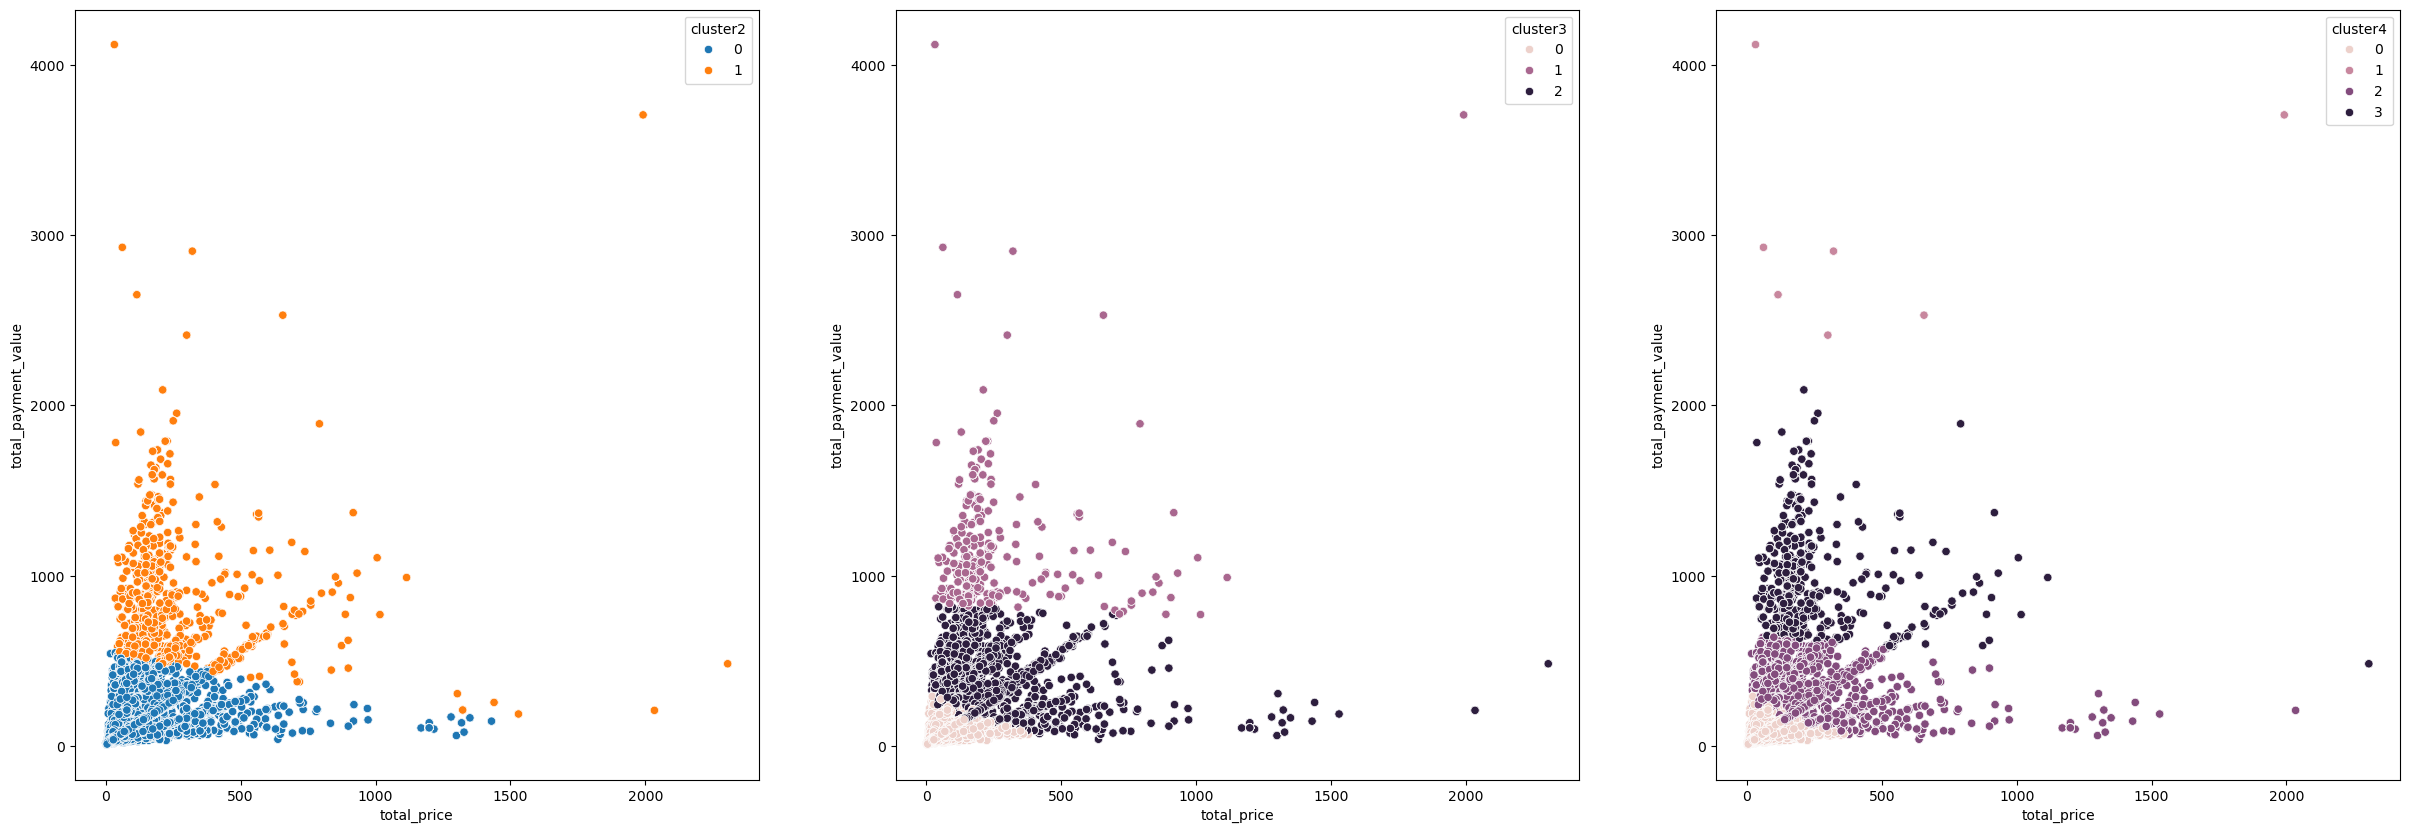

In [65]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.scatterplot(data=cluster_1, x='total_price', y='total_payment_value', hue='cluster2')
plt.subplot(1,3,2)
sns.scatterplot(data=cluster_1, x='total_price', y='total_payment_value', hue='cluster3')
plt.subplot(1,3,3)
sns.scatterplot(data=cluster_1, x='total_price', y='total_payment_value', hue='cluster4')

## 4-1. 엘보우 포인트 확인하기

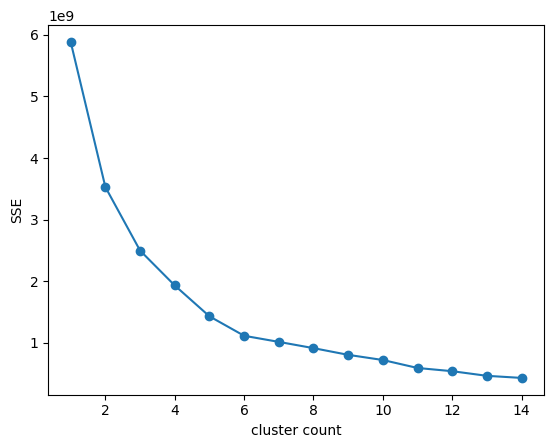

In [66]:
def elbow(df):
    sse = []
    for i in range(1,15):
        km = KMeans(n_clusters= i, init='k-means++', random_state=42)
        km.fit(df)
        sse.append(km.inertia_)
    
    plt.plot(range(1,15), sse, marker = 'o')
    plt.xlabel('cluster count')
    plt.ylabel('SSE')
    plt.show()

elbow(cluster_1)

## 4-2. 컬럼 별 상관관계 확인

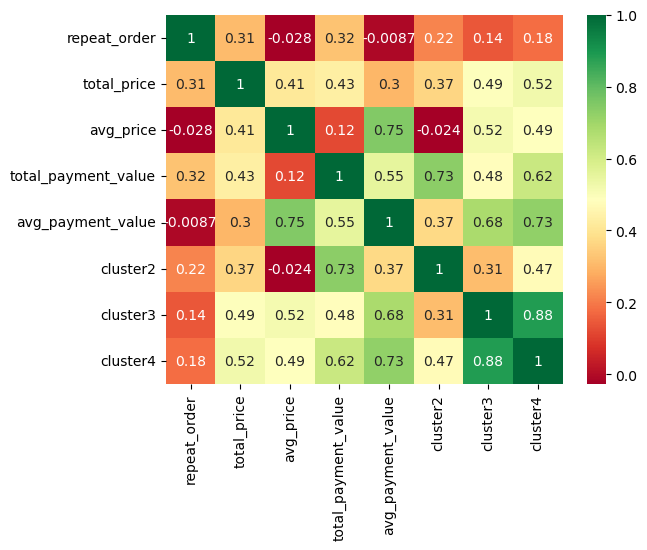

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 열의 값들 사이의 상관관계 행렬을 구합니다.
correlation_matrix = cluster_1.corr()

# 상관관계 행렬을 바탕으로 히트맵을 그립니다.
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn')

plt.show()

# 5. 군집 결과 해석

## 5-1. 군집 1

In [72]:
# 원본 자료는 살리기 위해 복사하기
merged_clu_df = merged_df_cleaned.copy()

# 클러스트 항목 설정
cluster_1 = merged_df_cleaned[['repeat_order','total_price', 'avg_price', 'total_payment_value', 'avg_payment_value']]

# 학습하기
# 군집 3개로 나누기
custoemr_kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
custoemr_kmeans3.fit(cluster_1)

# 군집된 결과 저장
merged_clu_df['cluster'] = custoemr_kmeans3.labels_


# 컬럼 지우는 함수
def del_cols(df):
    del df['order_id']
    del df['customer_id']
    del df['seller_id']
    del df['product_id']
    del df['order_approved_at']
    del df['order_delivered_timestamp']
    del df['order_estimated_delivery_date']
    
# 군집 특성 확인하는 함수
def character_visual(df):
    plt.figure(figsize=(20,20))

    for i in range(len(df.columns)):
    
        cols = list(df.columns)[i]
    
        plt.subplot(4,6,i+1)
        sns.histplot(df, x=cols, palette='RdYlGn')
        plt.title(cols)
        

C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\App

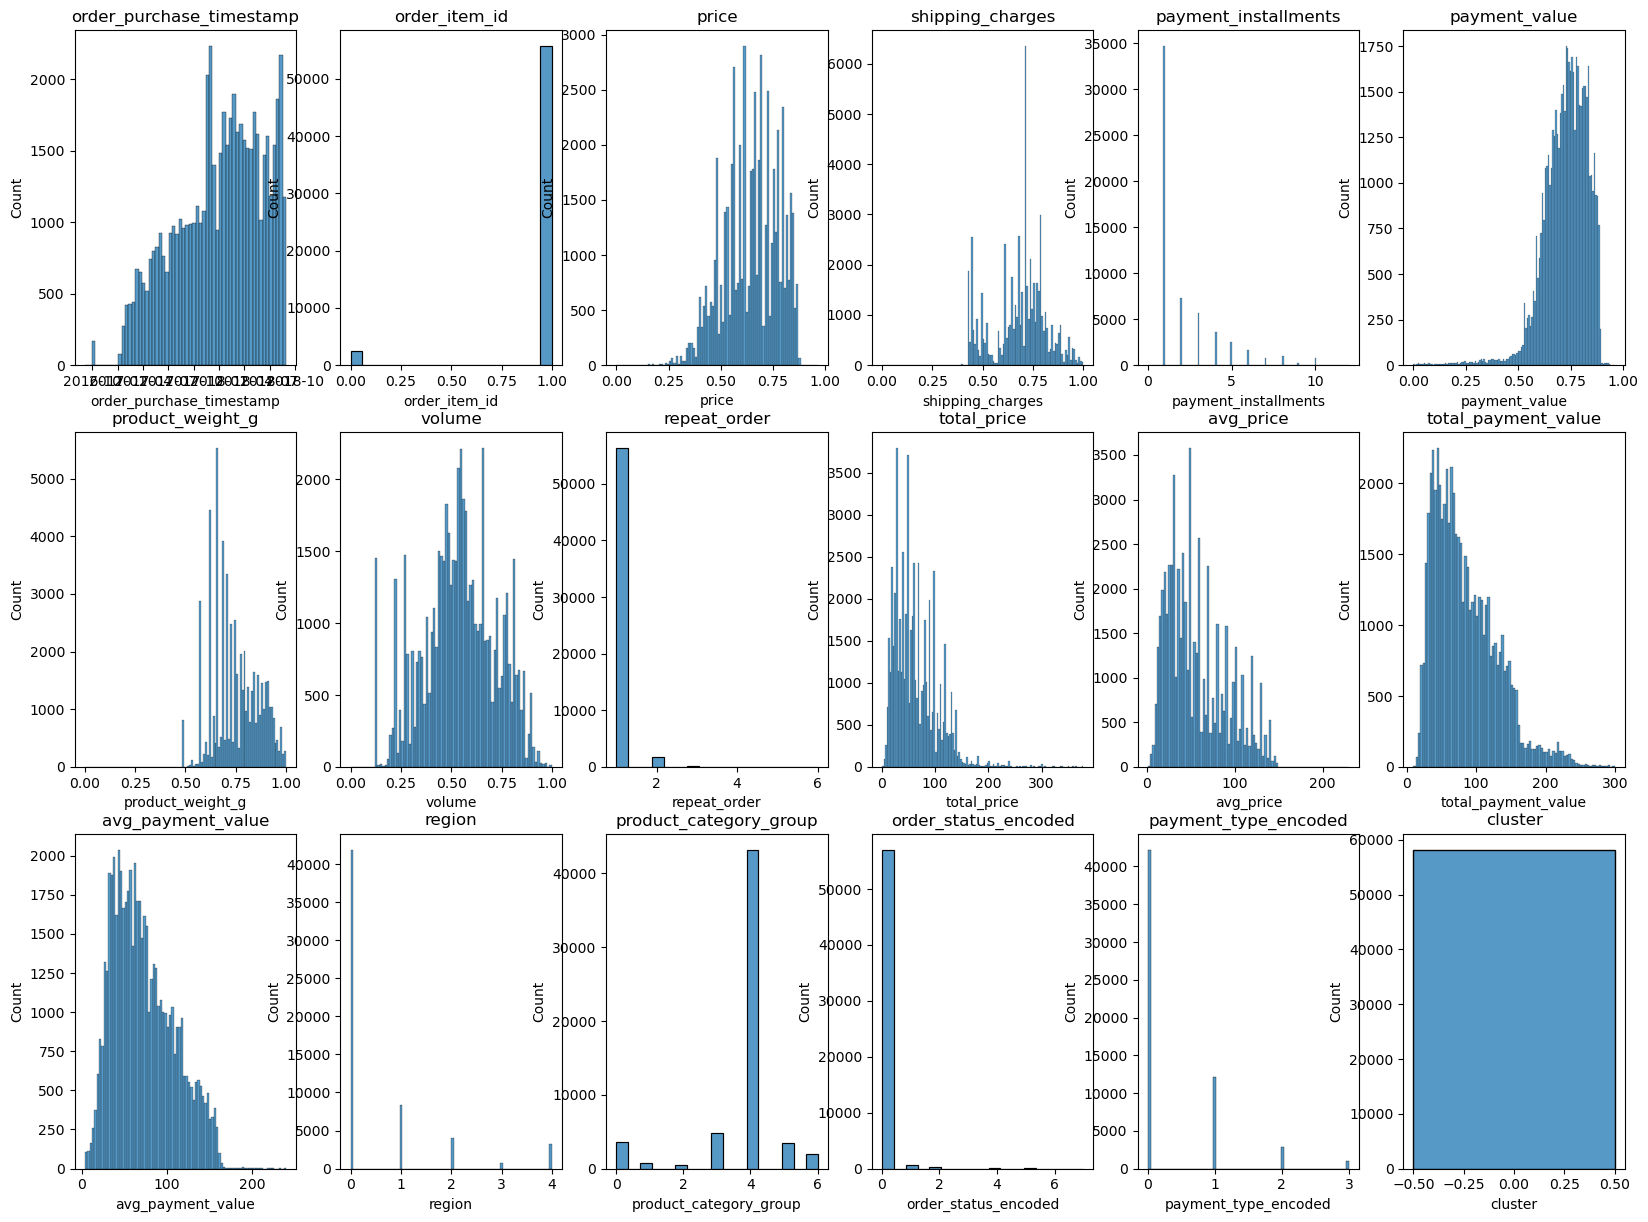

In [73]:
# 1번 군집만 설정
merged_clu1_df = merged_clu_df[merged_clu_df['cluster'] == 0]

del_cols(merged_clu1_df)
character_visual(merged_clu1_df)

## 5-2. 군집 2

C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\App

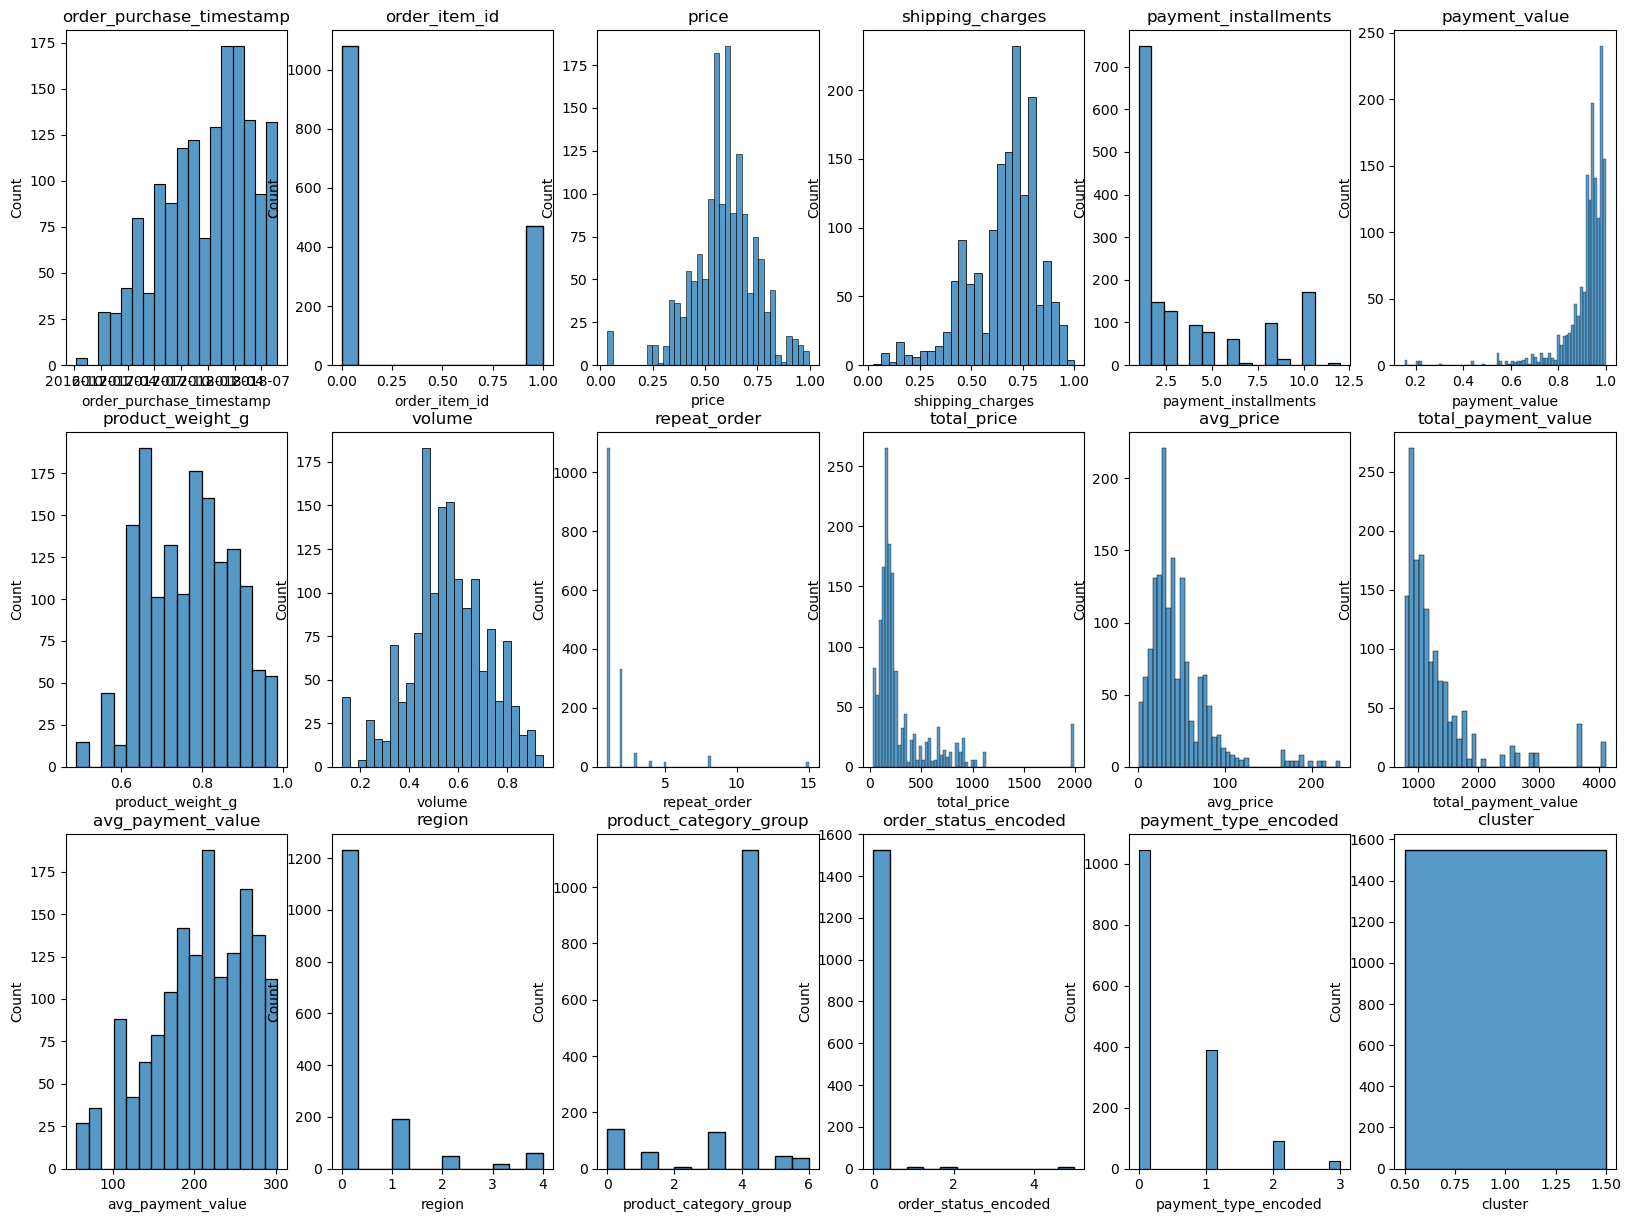

In [74]:
merged_clu2_df = merged_clu_df[merged_clu_df['cluster'] == 1]

del_cols(merged_clu2_df)
character_visual(merged_clu2_df)

## 5-2. 군집 3

C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\AppData\Local\Temp\ipykernel_2536\614600598.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df, x=cols, palette='RdYlGn')
C:\Users\Sungmin Kang\App

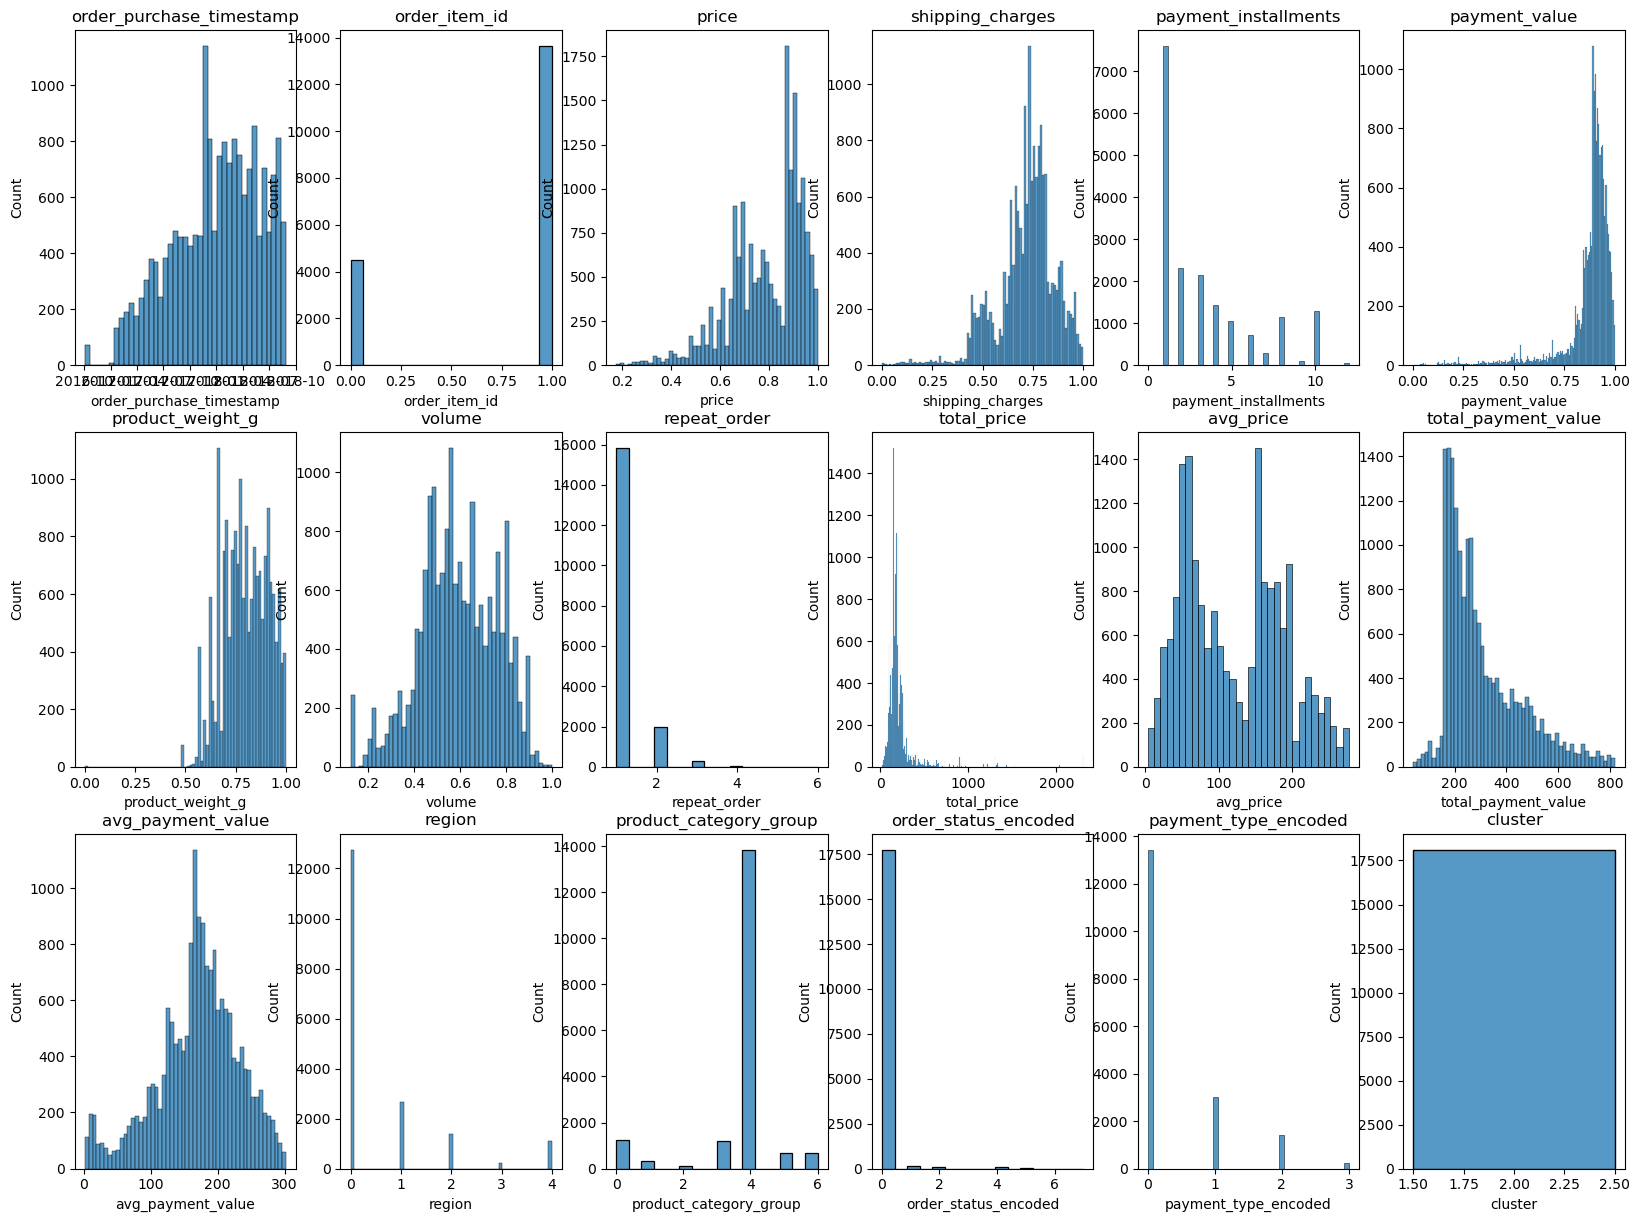

In [75]:
merged_clu3_df = merged_clu_df[merged_clu_df['cluster'] == 2]

del_cols(merged_clu3_df)
character_visual(merged_clu3_df)

#### 6. 추가 시각화

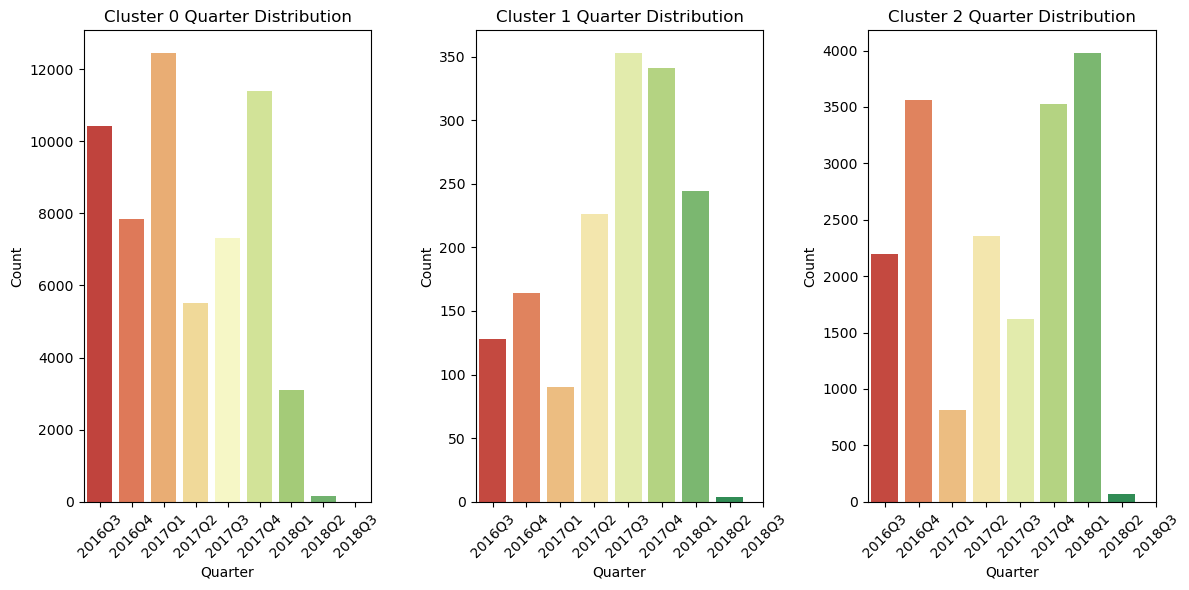

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

merged_df = merged_clu_df
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['quarter'] = merged_df['order_purchase_timestamp'].dt.to_period('Q')

# 모든 subplot에서 동일한 x축 레이블을 사용하기 위해 고유한 quarter 값을 얻음
unique_quarters = sorted(merged_df['quarter'].unique())

# 군집별로 quarter의 분포 시각화
plt.figure(figsize=(12, 6))

for cluster in range(3):  # 3개의 군집이 있으므로 0, 1, 2로 루프
    plt.subplot(1, 3, cluster + 1)
    sns.countplot(data=merged_df[merged_df['cluster'] == cluster], x='quarter', palette='RdYlGn')
    plt.title(f'Cluster {cluster} Quarter Distribution')
    plt.xlabel('Quarter')
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(unique_quarters)), labels=unique_quarters, rotation=45)  # 동일한 x축 레이블 설정

plt.tight_layout()
plt.show()

In [84]:
import pandas as pd

# 분기별 군집
rows = []

for quarter in sorted(merged_df['quarter'].unique()):
    row = {
        'Quarter': quarter,
        'Cluster 0 Count': merged_df[(merged_df['quarter'] == quarter) & (merged_df['cluster'] == 0)].shape[0],
        'Cluster 1 Count': merged_df[(merged_df['quarter'] == quarter) & (merged_df['cluster'] == 1)].shape[0],
        'Cluster 2 Count': merged_df[(merged_df['quarter'] == quarter) & (merged_df['cluster'] == 2)].shape[0]
    }
    rows.append(row)

# 데이터프레임으로 변환
summary_df = pd.DataFrame(rows)
print(summary_df)


  Quarter  Cluster 0 Count  Cluster 1 Count  Cluster 2 Count
0  2016Q3                1                0                0
1  2016Q4              167                4               71
2  2017Q1             3094               90              809
3  2017Q2             5523              128             1616
4  2017Q3             7309              226             2355
5  2017Q4            10413              244             3522
6  2018Q1            12451              353             3980
7  2018Q2            11397              341             3560
8  2018Q3             7855              164             2198


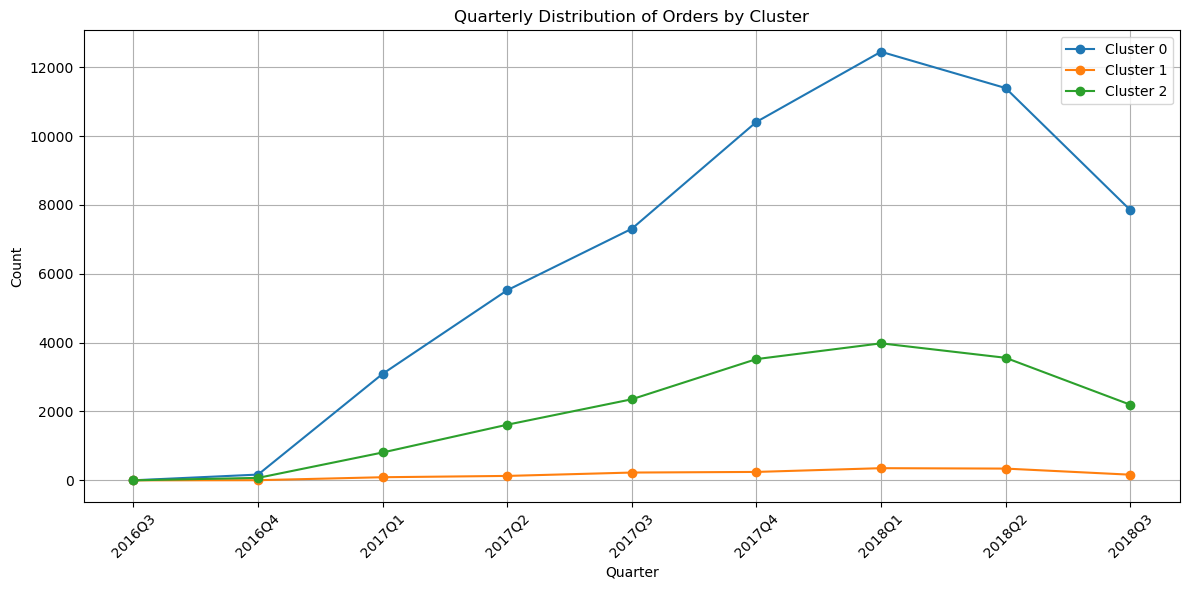

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 만들기
summary_df = pd.DataFrame(rows)

# 분기 열 str로 타입 변경
summary_df['Quarter'] = summary_df['Quarter'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))

plt.plot(summary_df['Quarter'], summary_df['Cluster 0 Count'], marker='o', label='Cluster 0')
plt.plot(summary_df['Quarter'], summary_df['Cluster 1 Count'], marker='o', label='Cluster 1')
plt.plot(summary_df['Quarter'], summary_df['Cluster 2 Count'], marker='o', label='Cluster 2')

plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Quarterly Distribution of Orders by Cluster')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\Sungmin Kang\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Sungmin Kang\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Sungmin Kang\anacond

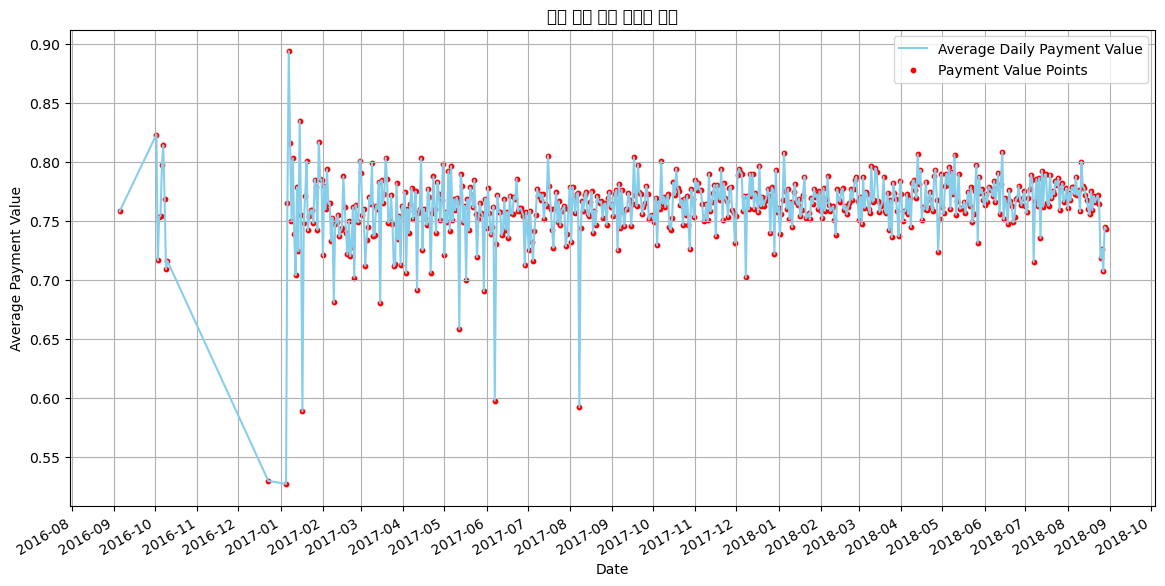

In [88]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'

daily_payment = df.groupby(df['order_purchase_timestamp'].dt.date)['payment_value'].mean()

plt.figure(figsize=(14, 7))

plt.plot(daily_payment.index, daily_payment.values, label='Average Daily Payment Value', color='skyblue')

plt.scatter(daily_payment.index, daily_payment.values, color='red', s=10, label='Payment Value Points')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title('Change in monthly average sales value')
plt.xlabel('Date')
plt.ylabel('Average Payment Value')
plt.legend()
plt.grid(True)
plt.show()